In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import seaborn as sns
import glob, os
import pickle
from functools import partial
import sklearn.preprocessing
import sklearn.ensemble
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import preprocessing
import math

In [3]:
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# from matplotlib.figure import Figure
# from tkinter import *

LARGE_FONT= ("Verdana", 12)

plt.style.use('bmh')
pd.options.display.float_format = '{:.5}'.format
pd.set_option('display.max_columns', 12)

In [4]:
# f_name = "WOMAN/22.csv"
# reqd_cols = ["state", "district", "rural", "age", 
#             "is_tubectomy", "is_vasectomy", "is_copper_t", 
#             "is_pills_daily", "is_piils_weekly", "is_emergency_contraceptive", "is_condom", "is_moder_methods", 
#             "is_contraceptive", "is_periodic_abstinence", "is_withdrawal", "is_amenorrahoea", "is_other_traditional_method",
#             "born_alive_total", "is_currently_pregnant", "no_of_times_conceived", "highest_qualification", "currently_widow", 
#             "religion", "social_group_code", "mother_age_when_baby_was_born", "year_of_marriage", "age_at_first_conception",
#             "sex", "year_of_birth", "year_of_intr", "year", 
#             "land_possessed", "cart", "is_water_pump", "is_tractor", "is_car", "is_scooter", "is_bicycle", "is_sewing_machine", 
#             "is_refrigerator", "is_washing_machine", "is_telephone", "is_computer", "is_television", "is_radio", 
#             "kitchen_availability", "no_of_dwelling_rooms", "cooking_fuel", "lighting_source", "household_have_electricity",
#             "is_toilet_shared", "toilet_used", "water_filteration", "is_water_filter", "drinking_water_source", "owner_status", 
#             "house_structure", "occupation_status", 
#             "diagnosed_for", "aware_abt_haf", "aware_abt_ort_ors", "aware_abt_ort_ors_zinc", "iscoveredbyhealthscheme"]

# with open(f_name) as fopen:
#     headline = fopen.readline().split('|')

# useful_cols = [i for i in range(len(headline)) if headline[i] in reqd_cols]

# df = pd.read_csv(f_name, '|', header=0, usecols=useful_cols)
# # my_read_csv = partial(pd.read_csv, sep='|', header=0, usecols=useful_cols)
# # df = pd.concat(map(my_read_csv, glob.glob(os.path.join('WOMAN', "*.csv"))))
# print(df.shape)

In [5]:
# df.to_pickle('woman_22.pkl')

df = pd.read_pickle('woman_22.pkl')

In [6]:
# print (df.head(3))
# print (df.info())

scatter plot of diagonised_for vs demographic variables

In [6]:
pd.set_option('display.max_columns', 12)

df1 = df[df.is_telephone.isnull()==False]
features = ["land_possessed", "cart", "is_water_pump", "is_tractor", "is_car", "is_scooter", "is_bicycle", "is_sewing_machine", 
            "is_refrigerator", "is_washing_machine", "is_telephone", "is_computer", "is_television", "is_radio", 
            "kitchen_availability", "no_of_dwelling_rooms", "cooking_fuel", "lighting_source", "household_have_electricity",
            "toilet_used", "is_water_filter", "drinking_water_source", "owner_status", 
            "house_structure"]
df1 = df1[features]
# print(df.shape, df1.shape)
# print(df1.info())

# df1 = df1[df1.house_structure != 'SHIV NARAYAN MAHTO']
print(df1.house_structure.value_counts())

x = StandardScaler().fit_transform(df1)
print(pd.DataFrame(data = x, columns = features).head())

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1'])
print(principalDf.head(5))

# principalDf.plot(x = 'pc1', y = 'pc2', style='.')
# plt.figure(figsize=(20, 16))
# plt.scatter(principalDf['pc1'], principalDf['pc2'])
# plt.show()



3.0    400399
1.0    176388
2.0    146741
4.0      1054
Name: house_structure, dtype: int64
   land_possessed    cart  is_water_pump  is_tractor  is_car  is_scooter  \
0        -0.35054   0.317        -4.4121     0.13198 0.18286     -2.0576   
1        -0.82525   0.317        -4.4121     0.13198 0.18286     -2.0576   
2        -0.82525 -3.3667        0.22665     0.13198 0.18286     0.48601   
3        -0.82525 -3.3667        0.22665     0.13198 0.18286     0.48601   
4        -0.35054   0.317        0.22665     0.13198 0.18286     0.48601   

        ...         household_have_electricity  toilet_used  is_water_filter  \
0       ...                           -0.39527      0.75729          0.73908   
1       ...                           -0.39527      0.75729          0.73908   
2       ...                           -0.39527       1.3881           -1.353   
3       ...                           -0.39527     -0.50429           -1.353   
4       ...                           -0.39527     

In [1]:
# threedee = plt.figure(15, 12).gca(projection='3d')
# threedee.scatter(principalDf['pc1'], principalDf['pc2'], principalDf['pc3'])
# threedee.set_xlabel('pc1')
# threedee.set_ylabel('pc2')
# threedee.set_zlabel('pc3')
# threedee.grid()

[1 0 0 ... 0 2 0]
[[-0.46926081 -0.04837091 -0.64478332]
 [ 4.45723599 -0.01546101  0.55419479]
 [-1.93023526  0.19836907  2.00815355]]
     pc1    pc2      pc3  target
0 2.5742 1.8784  -1.2382       1
1 1.9281 2.7236  -1.3229       0
2 1.2995 1.3833  -1.0431       0
3 1.0313 1.9497  -1.0178       0
4 1.8808 1.3937 -0.65169       0


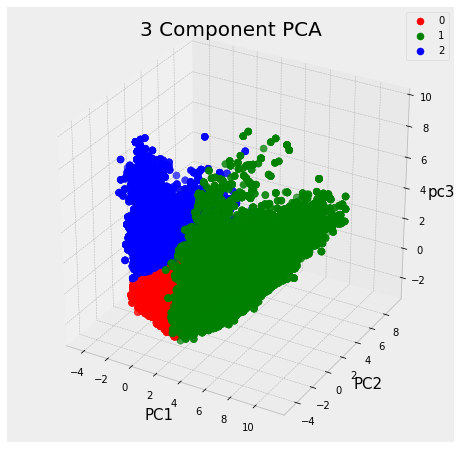

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(principalDf)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

finalDf = pd.concat([principalDf, pd.Series(kmeans.labels_)], axis = 1)
finalDf.rename(columns = {0:'target'}, inplace = True)
print(finalDf.head(5))

fig = plt.figure(figsize = (8,8))
threedee = fig.gca(projection='3d')
threedee.set_xlabel('PC1', fontsize = 15)
threedee.set_ylabel('PC2', fontsize = 15)
threedee.set_zlabel('pc3', fontsize = 15)
threedee.set_title('3 Component PCA', fontsize = 20)


targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    threedee.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , finalDf.loc[indicesToKeep, 'pc3']
               , c = color
               , s = 50)
threedee.legend(targets)
threedee.grid()

In [20]:
not_state = False
state_name = 22
not_district = False
district_name = 11
year_id = 1
print(df.year.value_counts())
def mcpr(not_state, state_name, not_district, district_name, year_id):
    mCPR = 0
    for i in range(3, 10):
        min_age = i*5
        max_age = i*5+4
        total_contraceptive = df[(df.year == year_id) & (not_state | (df.state == state_name)) & (not_district | (df.district == district_name)) & (min_age <= df.age) & (df.age <= max_age) & ((df.is_tubectomy == 1) | (df.is_vasectomy == 1) | (df.is_copper_t == 1) | (df.is_pills_daily == 1) | (df.is_piils_weekly == 1) | (df.is_emergency_contraceptive == 1) | (df.is_condom == 1) | (df.is_moder_methods == 1))].shape[0]
        total_women         = df[(df.year == year_id) & (not_state | (df.state == state_name)) & (not_district | (df.district == district_name)) & (min_age <= df.age) & (df.age <= max_age)].shape[0]
        mCPR += 5*total_contraceptive/total_women
    return mCPR

# print(mcpr(not_state, state_name, not_district, district_name, year_id))

def tfr(not_state, state_name, not_district, district_name, year_id):
    TFR = 0
    for i in range(3, 10):
        min_age = i*5
        max_age = i*5+4
        total_alive_birth = df[(df.year == year_id) & (not_state | (df.state == state_name)) & (not_district | (df.district == district_name)) & (min_age <= df.age) & (df.age <= max_age)].born_alive_total.sum()
        total_women       = df[(df.year == year_id) & (not_state | (df.state == state_name)) & (not_district | (df.district == district_name)) & (min_age <= df.age) & (df.age <= max_age)].shape[0]
        TFR += 5*total_alive_birth/total_women
    return TFR
print(tfr(not_state, state_name, not_district, district_name, year_id))

2.0    278826
3.0    249595
1.0    249199
Name: year, dtype: int64
86.55282730290867


In [21]:
X = []
Y = []
for i in range(1,4):
    not_state = False
    state_name = 22
    not_district = False
    district_name = 11
    year = i
    Y.append(mcpr(not_state, state_name, not_district, district_name, year))
    X.append(tfr(not_state, state_name, not_district, district_name, year))
print(X, Y)

[86.55282730290867, 89.78554885569746, 69.18364338292969] [30.71580579452831, 31.268626852938823, 28.432050457699223]


<IPython.core.display.Javascript object>


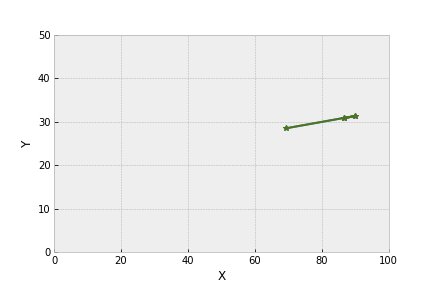

<IPython.core.display.Javascript object>


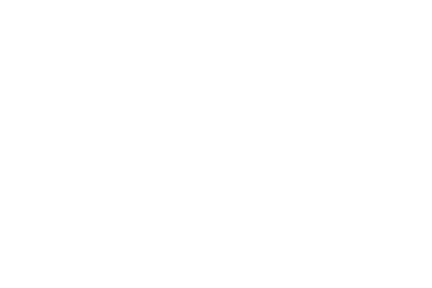

In [22]:

import time
def plt_dynamic(x, y, ax, colors=['-*']):
    for color in colors:
        ax.plot(x, y, color)
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X') ; ax.set_ylabel('Y')
ax.set_xlim(0,360) ; ax.set_ylim(-1,1)
xs, ys = [], []
plt.axis([0, 100, 0, 50])

for i in range(3):
    xs.append(X[i])
    ys.append(Y[i])
    plt_dynamic(xs, ys, ax)
    time.sleep(1)
plt_dynamic(xs, ys, ax)
# plt.savefig('line.gif')

<IPython.core.display.Javascript object>


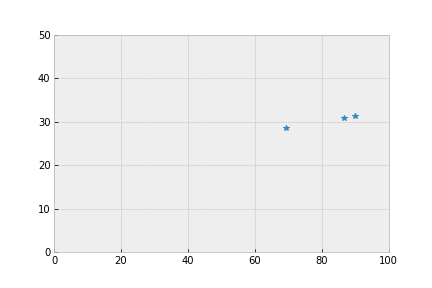

<IPython.core.display.Javascript object>


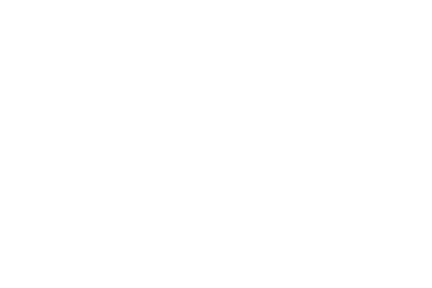

In [17]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
# plt.axis([0, 100, 0, 50])
fig.show()
fig.canvas.draw()

h1 = []
h2 = []
for i in range(0,3):
    ax.clear() # - Clear
    h1.append(X[i])
    h2.append(Y[i])

    plt.axis([0, 100, 0, 50])
    ax.plot(h1,h2,'*')
    
    fig.canvas.draw()
    time.sleep(1)

In [7]:
state_map = {}
state_map['assam']          = [18, ['KOKRAJHAR', 'DHUBRI', 'GOALPARA', 'BONGAIGAON', 'BARPETA', 'KAMRUP', 'NALBARI', 'DARRANG', 'MARIGAON', 'NAGAON', 'SONITPUR', 'LAKHIMPUR', 'DHEMAJI', 'TINSUKIA', 'DIBRUGARH', 'SIBSAGAR', 'JORHAT', 'GOLAGHAT', 'KARBI ANGLONG', 'NORTH CACHAR HILLS', 'CACHAR', 'KARIMGANJ', 'HAILAKANDI']]
state_map['bihar']          = [10, ['PASHCHIM CHAMPARAN', 'PURBA CHAMPARAN', 'SHEOHAR', 'SITAMARHI', 'MADHUBANI', 'SUPAUL', 'ARARIA', 'KISHANGANJ', 'PURNIA', 'KATIHAR', 'MADHEPURA', 'SAHARSA', 'DARBHANGA', 'MUZAFFARPUR', 'GOPALGANJ', 'SIWAN', 'SARAN', 'VAISHALI', 'SAMASTIPUR', 'BEGUSARAI', 'KHAGARIA', 'BHAGALPUR', 'BANKA', 'MUNGER', 'LAKHISARAI', 'SHEIKHPURA', 'NALANDA', 'PATNA', 'BHOJPUR', 'BUXAR', 'KAIMUR (BHABUA)', 'ROHTAS', 'JEHANABAD', 'AURANGABAD', 'GAYA', 'NAWADA', 'JAMUI']]
state_map['chhattisgarh']   = [22, ['KORIYA', 'SURGUJA', 'JASHPUR', 'RAIGARH', 'KORBA', 'JANJGIR - CHAMPA', 'BILASPUR', 'KAWARDHA', 'RAJNANDGAON', 'DURG', 'RAIPUR', 'MAHASAMUND', 'DHAMTARI', 'KANKER', 'BASTAR', 'DANTEWADA']]
state_map['jharkhand']      = [20, ['GARHWA', 'PALAMU', 'CHATRA', 'HAZARIBAGH', 'KODARMA', 'GIRIDIH', 'DEOGHAR', 'GODDA', 'SAHIBGANJ', 'PAKAUR', 'DUMKA', 'DHANBAD', 'BOKARO', 'RANCHI', 'LOHARDAGA', 'GUMLA', 'PASHCHIMI SINGHBHUM', 'PURBI SINGHBHUM']]
state_map['odisha']         = [21, ['BARGARH', 'JHARSUGUDA', 'SAMBALPUR', 'DEBAGARH', 'SUNDARGARH', 'KENDUJHAR', 'MAYURBHANJ', 'BALESHWAR', 'BHADRAK', 'KENDRAPARA', 'JAGATSINGHAPUR', 'CUTTACK', 'JAJAPUR', 'DHENKANAL', 'ANUGUL', 'NAYAGARH', 'KHORDHA', 'PURI', 'GANJAM', 'GAJAPATI', 'KANDHAMAL', 'BAUDH', 'SONAPUR', 'BALANGIR', 'NUAPADA', 'KALAHANDI', 'RAYAGADA', 'NABARANGAPUR', 'KORAPUT', 'MALKANGIRI']]
state_map['madhya pradesh'] = [23, ['SHEOPUR', 'MORENA', 'BHIND', 'GWALIOR', 'DATIA', 'SHIVPURI', 'GUNA', 'TIKAMGARH', 'CHHATARPUR', 'PANNA', 'SAGAR', 'DAMOH', 'SATNA', 'REWA', 'UMARIA', 'SHAHDOL', 'SIDHI', 'NEEMUCH', 'MANDSAUR', 'RATLAM', 'UJJAIN', 'SHAJAPUR', 'DEWAS', 'JHABUA', 'DHAR', 'INDORE', 'WEST NIMAR', 'BARWANI', 'EAST NIMAR', 'RAJGARH', 'VIDISHA', 'BHOPAL', 'SEHORE', 'RAISEN', 'BETUL', 'HARDA', 'HOSHANGABAD', 'KATNI', 'JABALPUR', 'NARSIMHAPUR', 'DINDORI', 'MANDLA', 'CHHINDWARA', 'SEONI', 'BALAGHAT']]
state_map['rajasthan']      = [8,  ['GANGANAGAR', 'HANUMANGARH', 'BIKANER', 'CHURU', 'JHUNJHUNUN', 'ALWAR', 'BHARATPUR', 'DHAULPUR', 'KARAULI', 'SAWAI MADHOPUR', 'DAUSA', 'JAIPUR', 'SIKAR', 'NAGAUR', 'JODHPUR', 'JAISALMER', 'BARMER', 'JALOR', 'SIROHI', 'PALI', 'AJMER', 'TONK', 'BUNDI', 'BHILWARA', 'RAJSAMAND', 'UDAIPUR', 'DUNGARPUR', 'BANSWARA', 'CHITTAURGARH', 'KOTA', 'BARAN', 'JHALAWAR']]
state_map['uttar pradesh']  = [9,  ['SAHARANPUR', 'MUZAFFARNAGAR', 'BIJNOR', 'MORADABAD', 'RAMPUR', 'JYOTIBA PHULE NAGAR', 'MEERUT', 'BAGHPAT', 'GHAZIABAD', 'GAUTAM BUDDHA NAGAR', 'BULANDSHAHR', 'ALIGARH', 'HATHRAS', 'MATHURA', 'AGRA', 'FIROZABAD', 'ETAH', 'MAINPURI', 'BUDAUN', 'BAREILLY', 'PILIBHIT', 'SHAHJAHANPUR', 'LAKHIMPUR KHERI', 'SITAPUR', 'HARDOI', 'UNNAO', 'LUCKNOW', 'RAE BARELI', 'FARRUKHABAD', 'KANNAUJ', 'ETAWAH', 'AURAIYA', 'KANPUR DEHAT', 'KANPUR NAGAR', 'JALAUN', 'JHANSI', 'LALITPUR', 'HAMIRPUR', 'MAHOBA', 'BANDA', 'CHITRAKOOT', 'FATEHPUR', 'PRATAPGARH', 'KAUSHAMBI', 'ALLAHABAD', 'BARABANKI', 'FAIZABAD', 'AMBEDKAR NAGAR', 'SULTANPUR', 'BAHRAICH', 'SHRAWASTI', 'BALRAMPUR', 'GONDA', 'SIDDHARTHNAGAR', 'BASTI', 'SANT KABIR NAGAR', 'MAHARAJGANJ', 'GORAKHPUR', 'KUSHINAGAR', 'DEORIA', 'AZAMGARH', 'MAU', 'BALLIA', 'JAUNPUR', 'GHAZIPUR', 'CHANDAULI', 'VARANASI', 'SANT RAVIDAS NAGAR BHADOHI', 'MIRZAPUR', 'SONBHADRA']]
state_map['uttarakhand']    = [5,  ['UTTARKASHI', 'CHAMOLI', 'RUDRAPRAYAG', 'TEHRI GARHWAL', 'DEHRADUN', 'GARHWAL', 'PITHORAGARH', 'BAGESHWAR', 'ALMORA', 'CHAMPAWAT', 'NAINITAL', 'UDHAM SINGH NAGAR', 'HARDWAR']]


### Calculate TFR

In [9]:
def tfr(not_state, state_name, not_district, district_name, not_education, highest_qual, not_religion, religion):
    TFR = 0
    for i in range(3, 10):
        min_age = i*5
        max_age = i*5+4
        total_alive_birth = df[(not_state | (df.state == state_name)) & (not_district | (df.district == district_name)) & (min_age <= df.age) & (df.age <= max_age) & (not_education | (df.highest_qualification == highest_qual)) & (not_religion | (df.religion == religion))].born_alive_total.sum()
        total_women       = df[(not_state | (df.state == state_name)) & (not_district | (df.district == district_name)) & (min_age <= df.age) & (df.age <= max_age) & (df.highest_qualification.isnull() == False) & (df.religion.isnull() == False)].shape[0]
        TFR += 5*total_alive_birth/total_women
    return TFR

### Plot TFR vs Education level for each district of a state. One state all district simultaneously.

In [10]:
not_state = False
not_district = False
state_name = 22
district_name = 1
TFR = 0
for i in range(3, 10):
    min_age = i*5
    max_age = i*5+4
    total_alive_birth = df[(not_state | (df.state == state_name)) & (not_district | (df.district == district_name)) & (min_age <= df.age) & (df.age <= max_age)].born_alive_total.sum()
    total_women       = df[(not_state | (df.state == state_name)) & (not_district | (df.district == district_name)) & (min_age <= df.age) & (df.age <= max_age)].shape[0]
    print(total_alive_birth, total_women)
    TFR += 5*total_alive_birth/total_women
print(TFR)

224.0 711
5563.0 4961
10900.0 5658
12946.0 5200
14154.0 4924
12342.0 4277
11499.0 4057
72.23503535869602


[0.044587242657675996, 0.05554637225888164, 0.03897262720184414, 0.03598997842986162, 0.011304794579052289, 0.16966359197527742, 0.017624534692815337, 0.006510610700847248, 0.0032062422374476316, 0.0002685935459435086]


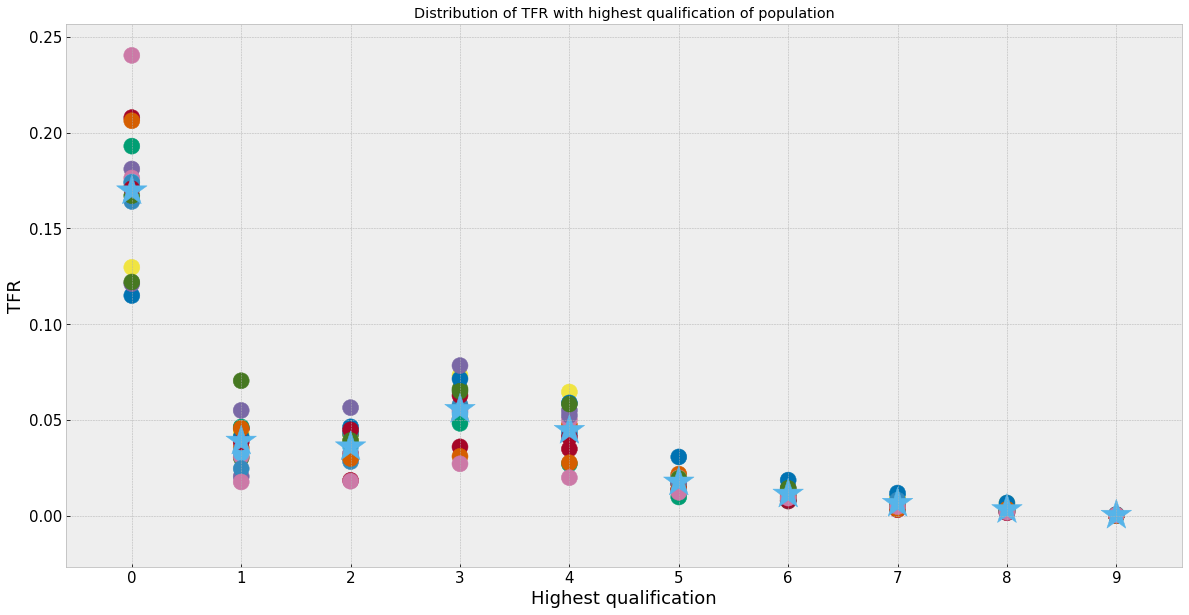

In [11]:
# def tfr_lit(not_state, state_name, not_district, district_name, c):
#     TFR = 0
#     for i in range(3, 10):
#         min_age = i*5
#         max_age = i*5+4
#         total_alive_birth = df[(not_state | (df.state == state_name)) & (not_district | (df.district == district_name)) & (min_age <= df.age) & (df.age <= max_age) & (df.highest_qualification == c)].born_alive_total.sum()
#         total_women       = df[(not_state | (df.state == state_name)) & (not_district | (df.district == district_name)) & (min_age <= df.age) & (df.age <= max_age) & (df.highest_qualification.isnull() == False)].shape[0]
#         TFR += 5*total_alive_birth/total_women
#     return TFR

plt.figure(figsize=(20,10))
X = [int(x) for x in (df.highest_qualification.unique()) if str(x) != 'nan']
plt.xticks(X)
ax = plt.gca()
ax.tick_params(axis = 'both', labelsize = 15)
plt.title('Distribution of TFR with highest qualification of population')
# plt.rcParams['axes.facecolor'] = 'black'
plt.xlabel('Highest qualification', fontsize=18)
plt.ylabel('TFR', fontsize=18)
no_of_dists = len(state_map['chhattisgarh'][1])
Y_mean = [0 for c in range(len(X))]

for i in range(1, 1+no_of_dists):
    Y1 = []
    for c in X:
        not_state = False
        state_name = 22
        not_district = False
        district_name = i
        not_education = False
        highest_qual = c
        not_religion = True
        religion = c
        Y1.append(tfr(not_state, state_name, not_district, district_name, not_education, highest_qual, not_religion, religion))
    Y1 = [np.log10(1+(c/sum(Y1))) for c in Y1] #np.log10
    Y_mean = [(c1+c2) for (c1, c2) in zip(Y_mean, Y1)]
    s = [4**4 for c in range(len(X))]
    plt.scatter(X, Y1, marker='o', s = s)
Y_mean = [c/no_of_dists for c in Y_mean]

s = [4**5 for c in range(len(X))]
plt.scatter(X, Y_mean, marker='*', s = s)
plt.savefig('tfr_vs_highest_qualification.png')
plt.show()

In [12]:
print(Y_mean, X)

[0.044587242657675996, 0.05554637225888164, 0.03897262720184414, 0.03598997842986162, 0.011304794579052289, 0.16966359197527742, 0.017624534692815337, 0.006510610700847248, 0.0032062422374476316, 0.0002685935459435086] [4, 3, 1, 2, 6, 0, 5, 7, 8, 9]


### Plot TFR vs Religion for each state 

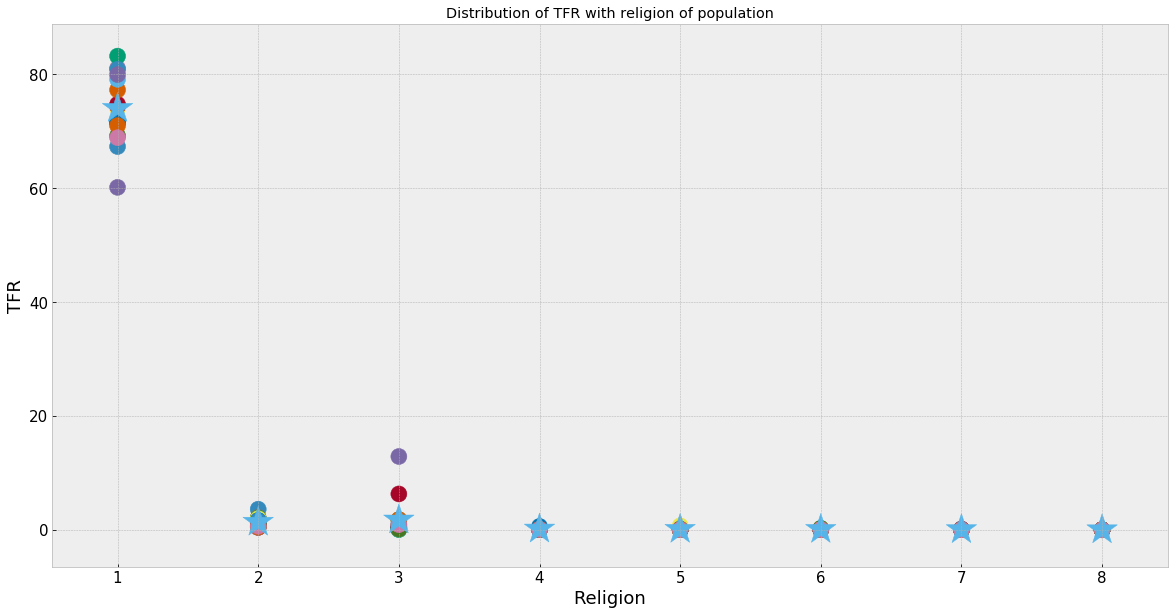

In [10]:
plt.figure(figsize=(20,10))
X = [int(x) for x in (df.religion.unique()) if str(x) != 'nan']
plt.xticks(X)
ax = plt.gca()
ax.tick_params(axis = 'both', labelsize = 15)
plt.title('Distribution of TFR with religion of population')
# plt.rcParams['axes.facecolor'] = 'black'
plt.xlabel('Religion', fontsize=18)
plt.ylabel('TFR', fontsize=18)
no_of_dists = len(state_map['chhattisgarh'][1])
Y_mean = [0 for c in range(len(X))]

for i in range(1, 1+no_of_dists):
    Y1 = []
    for c in X:
        not_state = False
        state_name = 22
        not_district = False
        district_name = i
        not_education = True
        highest_qual = c
        not_religion = False
        religion = c
        Y1.append(tfr(not_state, state_name, not_district, district_name, not_education, highest_qual, not_religion, religion))
    Y1 = [(c) for c in Y1] #np.log10
    Y_mean = [(c1+c2) for (c1, c2) in zip(Y_mean, Y1)]
    s = [4**4 for c in range(len(X))]
    plt.scatter(X, Y1, marker='o', s=s)
Y_mean = [c/no_of_dists for c in Y_mean]
s = [4**5 for c in range(len(X))]
plt.scatter(X, Y_mean, marker='*', s = s)
plt.savefig('tfr_vs_religion.png')
plt.show()

### Plot TFR vs District of a state

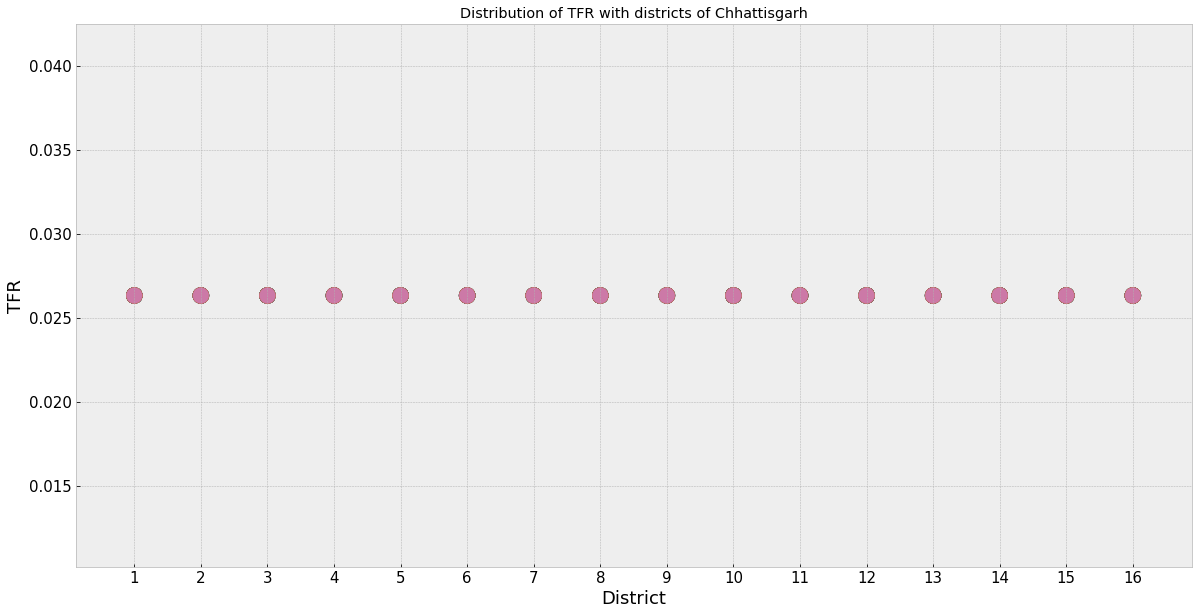

In [11]:
plt.figure(figsize=(20,10))
X = [int(x) for x in (df.district.unique()) if str(x) != 'nan']
plt.xticks(X)
ax = plt.gca()
ax.tick_params(axis = 'both', labelsize = 15)
plt.title('Distribution of TFR with districts of Chhattisgarh')
# plt.rcParams['axes.facecolor'] = 'white'
plt.xlabel('District', fontsize=18)
plt.ylabel('TFR', fontsize=18)
no_of_dists = len(state_map['chhattisgarh'][1])
# Y_mean = [0 for c in range(len(X))]

for i in range(1, 1+no_of_dists):
    Y1 = []
    for c in X:
        not_state = False
        state_name = 22
        not_district = False
        district_name = i
        not_education = True
        highest_qual = c
        not_religion = True
        religion = c
        Y1.append(tfr(not_state, state_name, not_district, district_name, not_education, highest_qual, not_religion, religion))
    Y1 = [np.log10(1+(c/sum(Y1))) for c in Y1] #np.log10
#     Y_mean = [(c1+c2) for (c1, c2) in zip(Y_mean, Y1)]
    s = [4**4 for c in range(len(X))]
    plt.scatter(X, Y1, marker='o', s = s)
# plt.savefig('tfr_vs_religion.png')
plt.show()
# Y_mean = [c/no_of_dists for c in Y_mean]
# s = [4**5 for c in range(len(X))]
# plt.scatter(X, Y_mean, marker='*', s = s)

### Plot IsCoveredByHealthScheme vs Highest qualification level for  a state

In [12]:
# print(df.iscoveredbyhealthscheme.unique())
# Y = [int(x) for x in (df.iscoveredbyhealthscheme.unique()) if str(x) != 'nan']
# print(df.highest_qualification.unique())
# X = [int(x) for x in (df.highest_qualification.unique()) if str(x) != 'nan']
# print(Y, X)

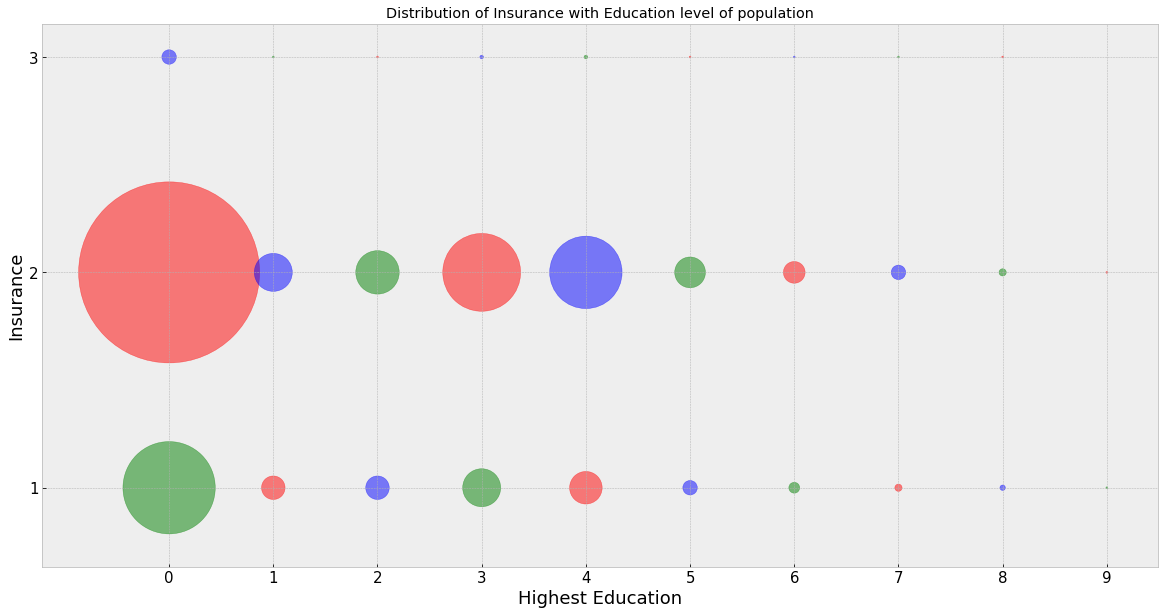

In [13]:

df1 = df.loc[(df.iscoveredbyhealthscheme.isnull() == False) & (df.highest_qualification.isnull() == False), ['iscoveredbyhealthscheme', 'highest_qualification']]

df_grp = df1.groupby(['iscoveredbyhealthscheme','highest_qualification']).size().reset_index(name='counts')

s = df_grp[['counts']]
min_max_scaler = preprocessing.MinMaxScaler()
s = min_max_scaler.fit_transform(s)
s = pd.DataFrame(s)
s = list(s[0])

s = [math.ceil(c * 100.0) / 100.0 for c in s]
# print(s)
s = [(2**15)*c**2 for c in s]

plt.figure(figsize=(20,10))
X = sorted([int(x) for x in (df_grp.highest_qualification.unique()) if str(x) != 'nan'])
Y = sorted([int(y) for y in (df_grp.iscoveredbyhealthscheme.unique()) if str(y) != 'nan'])
my_Y = ['Yes', 'No', "Don't know"]
plt.xticks(X)
plt.yticks(Y)
plt.title('Distribution of Insurance with Education level of population')
ax = plt.gca()
ax.tick_params(axis = 'both', labelsize = 15)

# plt.rcParams['axes.facecolor'] = 'black'
plt.xlabel('Highest Education', fontsize=18)
plt.ylabel('Insurance', fontsize=18)

colors = 'grb'
plt.scatter(df_grp.highest_qualification, df_grp.iscoveredbyhealthscheme, c=colors, alpha=0.5, s=s)
plt.savefig('insurance_vs_education_bubble.png')
plt.show()

0-Illiterate   
1-Literate Without formal education  
2-Literate With formal education-Below primary  
3-Literate With formal education-Primary  
4-Literate With formal education-Middle  
5-Literate With formal education-Secondary/Matric (Class-X)  
6-Literate With formal education-Hr. Secondary/Sr. Secondary/Pre-university(Class XII)  
7-Literate With formal education-Graduate/B.Tech/B.B.A/MBBS/Equivalent  
8-Literate With formal education-Post Grad/ M.Tech/M.B.A/ MD/Equivalent or higher  
9-Literate With formal education-Non-technical/Technical diploma or certificate not equivalent to a degree

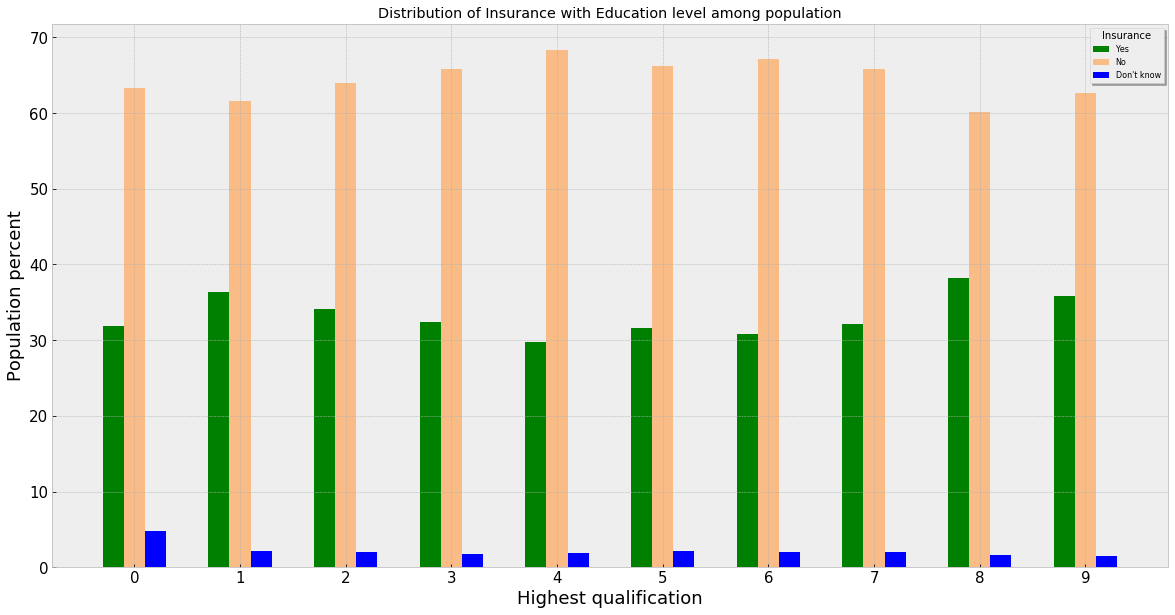

In [46]:
df1 = df.loc[(df.iscoveredbyhealthscheme.isnull() == False) & (df.highest_qualification.isnull() == False), ['iscoveredbyhealthscheme', 'highest_qualification']]

df_grp = df1.groupby(['iscoveredbyhealthscheme','highest_qualification']).size().reset_index(name='counts')

plt.figure(figsize=(20,10))
X = sorted([int(x) for x in (df_grp.highest_qualification.unique()) if str(x) != 'nan'])
Y = np.arange(0, 100, 10)
plt.xticks(X)
plt.yticks(Y)
plt.title('Distribution of Insurance with Education level among population')
ax = plt.gca()
ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Highest qualification', fontsize=18)
plt.ylabel('Population percent', fontsize=18)

insurance_yes = df_grp.loc[(df_grp.iscoveredbyhealthscheme == 1), ['highest_qualification', 'counts']]
insurance_no = df_grp.loc[(df_grp.iscoveredbyhealthscheme == 2), ['highest_qualification', 'counts']]
insurance_no_idea = df_grp.loc[(df_grp.iscoveredbyhealthscheme == 3), ['highest_qualification', 'counts']]

totals = [i+j+k for i,j,k in zip(insurance_yes.counts, insurance_no.counts, insurance_no_idea.counts)]
greenBars = [i / j * 100 for i,j in zip(insurance_yes.counts, totals)]
orangeBars = [i / j * 100 for i,j in zip(insurance_no.counts, totals)]
blueBars = [i / j * 100 for i,j in zip(insurance_no_idea.counts, totals)]


plt.bar(insurance_yes.highest_qualification-0.2, greenBars, width=0.2, color='g', align='center', label='Yes')
plt.bar(insurance_no.highest_qualification, orangeBars, width=0.2, color='#f9bc86', align='center', label='No')
plt.bar(insurance_no_idea.highest_qualification+0.2, blueBars, width=0.2, color='b', align='center', label="Don't know")
plt.legend(loc='best', fontsize = 8, shadow = True, fancybox = False, title ='Insurance', ncol =1)
plt.savefig('insurance_vs_education.png')
plt.show()
# vs_highest_qualification('iscoveredbyhealthscheme', 'Insurance', 'Distribution of Insurance with Education level among population', 20, 'insurance_vs_education.png')

### Plot IsCoveredByHealthScheme vs Religion for each state

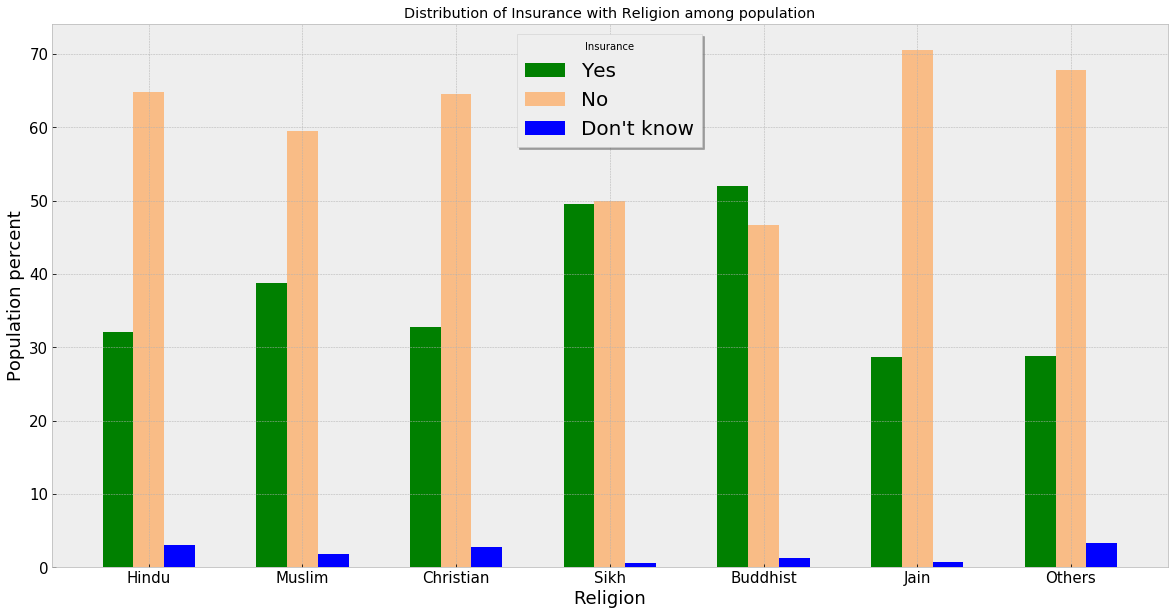

In [15]:
df1 = df.loc[(df.iscoveredbyhealthscheme.isnull() == False) & (df.religion.isnull() == False) & (df.religion != 8), ['iscoveredbyhealthscheme', 'religion']]

df_grp = df1.groupby(['iscoveredbyhealthscheme','religion']).size().reset_index(name='counts')
# print(df_grp)
plt.figure(figsize=(20,10))
X = sorted([int(x) for x in (df_grp.religion.unique()) if str(x) != 'nan'])
Y = np.arange(0, 100, 10)
my_X = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Others']
plt.xticks(X, my_X)
plt.yticks(Y)
plt.title('Distribution of Insurance with Religion among population')
ax = plt.gca()
ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Religion', fontsize=18)
plt.ylabel('Population percent', fontsize=18)

insurance_yes = df_grp.loc[(df_grp.iscoveredbyhealthscheme == 1), ['religion', 'counts']]
insurance_no = df_grp.loc[(df_grp.iscoveredbyhealthscheme == 2), ['religion', 'counts']]
insurance_no_idea = df_grp.loc[(df_grp.iscoveredbyhealthscheme == 3), ['religion', 'counts']]

totals = [i+j+k for i,j,k in zip(insurance_yes.counts, insurance_no.counts, insurance_no_idea.counts)]
greenBars = [i / j * 100 for i,j in zip(insurance_yes.counts, totals)]
orangeBars = [i / j * 100 for i,j in zip(insurance_no.counts, totals)]
blueBars = [i / j * 100 for i,j in zip(insurance_no_idea.counts, totals)]

plt.bar(insurance_yes.religion-0.2, greenBars, width=0.2, color='g', align='center', label='Yes')
plt.bar(insurance_no.religion, orangeBars, width=0.2, color='#f9bc86', align='center', label='No')
plt.bar(insurance_no_idea.religion+0.2, blueBars, width=0.2, color='b', align='center', label="Don't know")
plt.legend(loc='best', fontsize = 20, shadow = True, fancybox = False, title ='Insurance', ncol =1)
plt.savefig('insurance_vs_religion.png')
plt.show()

### Plot IsCoveredByHealthScheme vs District of a state

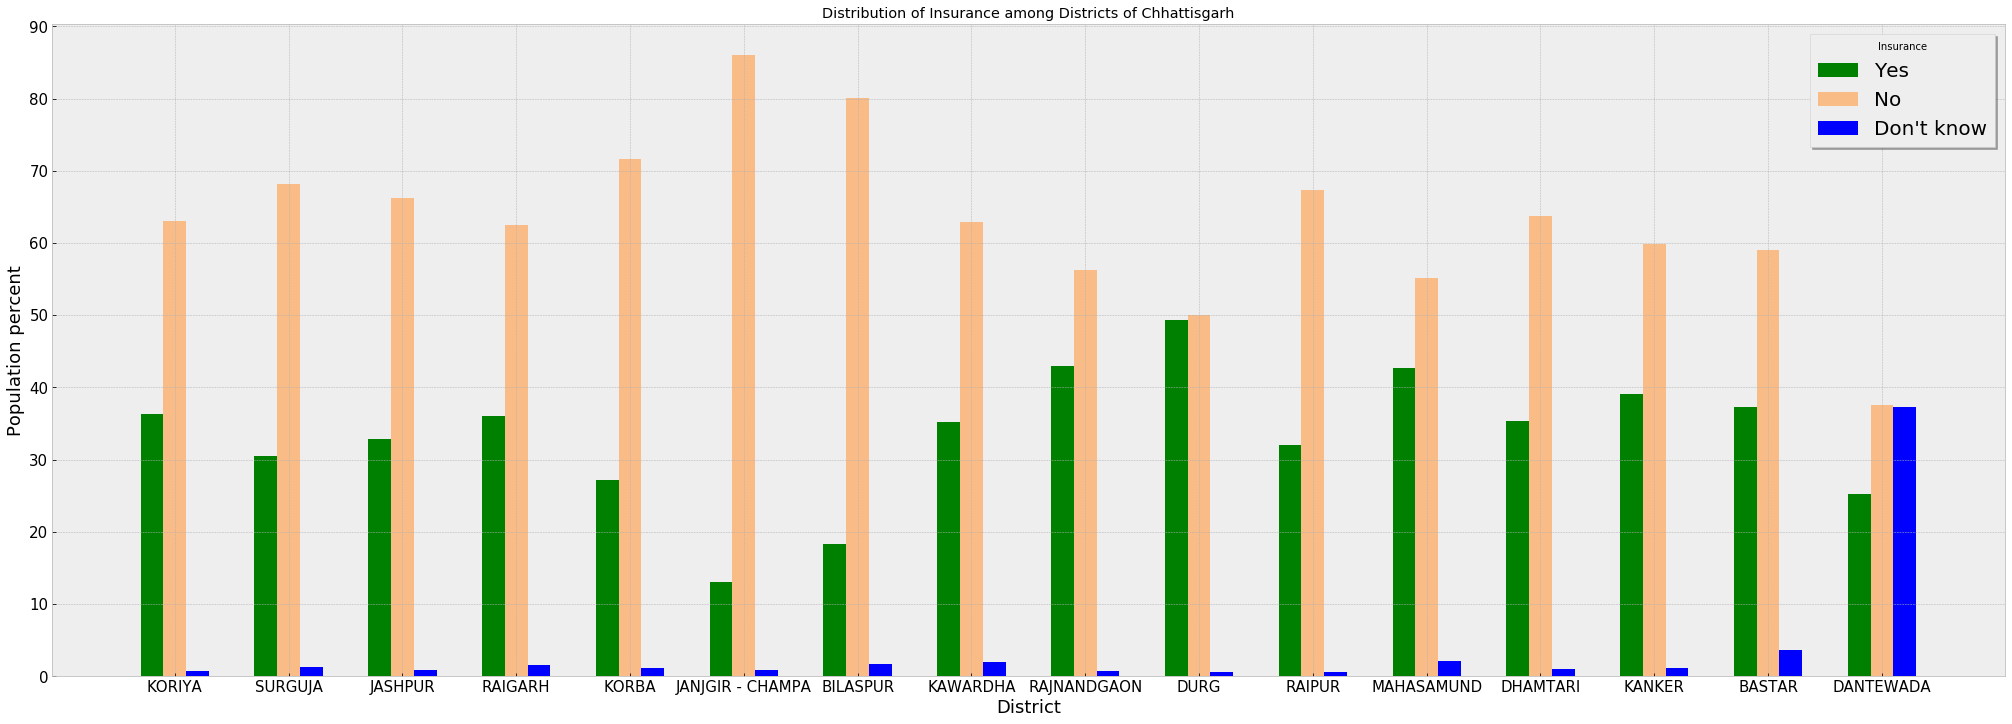

In [16]:
df1 = df.loc[(df.iscoveredbyhealthscheme.isnull() == False) & (df.district.isnull() == False), ['iscoveredbyhealthscheme', 'district']]

df_grp = df1.groupby(['iscoveredbyhealthscheme','district']).size().reset_index(name='counts')
# print(df_grp)
plt.figure(figsize=(35,12))
X = sorted([int(x) for x in (df_grp.district.unique()) if str(x) != 'nan'])
Y = np.arange(0, 100, 10)
my_X = state_map['chhattisgarh'][1]
plt.xticks(X, my_X)
plt.yticks(Y)
plt.title('Distribution of Insurance among Districts of Chhattisgarh')
ax = plt.gca()
ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('District', fontsize=18)
plt.ylabel('Population percent', fontsize=18)

insurance_yes = df_grp.loc[(df_grp.iscoveredbyhealthscheme == 1), ['district', 'counts']]
insurance_no = df_grp.loc[(df_grp.iscoveredbyhealthscheme == 2), ['district', 'counts']]
insurance_no_idea = df_grp.loc[(df_grp.iscoveredbyhealthscheme == 3), ['district', 'counts']]

totals = [i+j+k for i,j,k in zip(insurance_yes.counts, insurance_no.counts, insurance_no_idea.counts)]
greenBars = [i / j * 100 for i,j in zip(insurance_yes.counts, totals)]
orangeBars = [i / j * 100 for i,j in zip(insurance_no.counts, totals)]
blueBars = [i / j * 100 for i,j in zip(insurance_no_idea.counts, totals)]

plt.bar(insurance_yes.district-0.2, greenBars, width=0.2, color='g', align='center', label='Yes')
plt.bar(insurance_no.district, orangeBars, width=0.2, color='#f9bc86', align='center', label='No')
plt.bar(insurance_no_idea.district+0.2, blueBars, width=0.2, color='b', align='center', label="Don't know")
plt.legend(loc='best', fontsize = 20, shadow = True, fancybox = False, title ='Insurance', ncol =1)
plt.savefig('insurance_vs_district.png')
plt.show()

### Functions for plotting Different variables vs demographic variables such as Education, Religion and District

In [17]:
def vs_highest_qualification(a, legend_title, graph_title, legend_size, fig_name):
    df1 = df.loc[(df[a].isnull() == False) & (df.highest_qualification.isnull() == False), [a, 'highest_qualification']]

    df_grp = df1.groupby([a,'highest_qualification']).size().reset_index(name='counts')

    plt.figure(figsize=(20,10))
    X = sorted([int(x) for x in (df_grp.highest_qualification.unique()) if str(x) != 'nan'])
    Y = np.arange(0, 100, 10)
    plt.xticks(X)
    plt.yticks(Y)
    plt.title(graph_title)
    ax = plt.gca()
    ax.tick_params(axis = 'both', labelsize = 15)

    plt.xlabel('Highest qualification', fontsize=18)
    plt.ylabel('Population percent', fontsize=18)

    _yes = df_grp.loc[(df_grp[a] == 1), ['highest_qualification', 'counts']]
    _no = df_grp.loc[(df_grp[a] == 2), ['highest_qualification', 'counts']]
    _not_know = []

    for i in X:
        _not_know.append(df[df.highest_qualification == i][a].isnull().sum())
    rel = np.asarray(X)
    
    totals = [i+j+k for i,j,k in zip(_yes.counts, _no.counts, _not_know)]
    greenBars = [i / j * 100 for i,j in zip(_yes.counts, totals)]
    orangeBars = [i / j * 100 for i,j in zip(_no.counts, totals)]
    blueBars = [i / j * 100 for i,j in zip(_not_know, totals)]

    plt.bar(_yes.highest_qualification-0.2, greenBars, width=0.2, color='g', align='center', label='Yes')
    plt.bar(_no.highest_qualification, orangeBars, width=0.2, color='#f9bc86', align='center', label='No')
    plt.bar(rel+0.2, blueBars, width=0.2, color='b', align='center', label="Don't know")
    plt.legend(loc='best', fontsize = legend_size, shadow = True, fancybox = False, title = legend_title, ncol = 1)
    plt.savefig(fig_name)
    plt.show()

def vs_religion(a, legend_title, graph_title, legend_size, fig_name):
    df1 = df.loc[(df[a].isnull() == False) & (df.religion.isnull() == False) & (df.religion != 8), [a, 'religion']]

    df_grp = df1.groupby([a,'religion']).size().reset_index(name='counts')

    plt.figure(figsize=(20,10))
    X = sorted([int(x) for x in (df_grp.religion.unique()) if str(x) != 'nan'])
    Y = np.arange(0, 100, 10)
    my_X = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Others']
    plt.xticks(X, my_X)
    plt.yticks(Y)
    plt.title(graph_title)
    ax = plt.gca()
    ax.tick_params(axis = 'both', labelsize = 15)

    plt.xlabel('Religion', fontsize=18)
    plt.ylabel('Population percent', fontsize=18)

    _yes = df_grp.loc[(df_grp[a] == 1), ['religion', 'counts']]
    _no = df_grp.loc[(df_grp[a] == 2), ['religion', 'counts']]
    _not_know = []

    for i in X:
        _not_know.append(df[df.religion == i][a].isnull().sum())
    rel = np.asarray(X)
    
    totals = [i+j+k for i,j,k in zip(_yes.counts, _no.counts, _not_know)]
    greenBars = [i / j * 100 for i,j in zip(_yes.counts, totals)]
    orangeBars = [i / j * 100 for i,j in zip(_no.counts, totals)]
    blueBars = [i / j * 100 for i,j in zip(_not_know, totals)]

    print(_no.religion)
    plt.bar(_yes.religion-0.2, greenBars, width=0.2, color='g', align='center', label='Yes')
    plt.bar(_no.religion, orangeBars, width=0.2, color='#f9bc86', align='center', label='No')
    plt.bar(rel+0.2, blueBars, width=0.2, color='b', align='center', label="Don't know")
    plt.legend(loc='best', fontsize = legend_size, shadow = True, fancybox = False, title = legend_title, ncol = 1)
    plt.savefig(fig_name)
    plt.show()

def vs_district(a, legend_title, graph_title, legend_size, fig_name):
    df1 = df.loc[(df[a].isnull() == False) & (df.district.isnull() == False), [a, 'district']]

    df_grp = df1.groupby([a,'district']).size().reset_index(name='counts')

    plt.figure(figsize=(35,12))
    X = sorted([int(x) for x in (df_grp.district.unique()) if str(x) != 'nan'])
    Y = np.arange(0, 100, 10)
    my_X = state_map['chhattisgarh'][1]
    plt.xticks(X, my_X)
    plt.yticks(Y)
    plt.title(graph_title)
    ax = plt.gca()
    ax.tick_params(axis = 'both', labelsize = 15)

    plt.xlabel('District', fontsize=18)
    plt.ylabel('Population percent', fontsize=18)

    _yes = df_grp.loc[(df_grp[a] == 1), ['district', 'counts']]
    _no = df_grp.loc[(df_grp[a] == 2), ['district', 'counts']]
    _not_know = []

    for i in X:
        _not_know.append(df[df.district == i][a].isnull().sum())
    rel = np.asarray(X)
    
    totals = [i+j+k for i,j,k in zip(_yes.counts, _no.counts, _not_know)]
    greenBars = [i / j * 100 for i,j in zip(_yes.counts, totals)]
    orangeBars = [i / j * 100 for i,j in zip(_no.counts, totals)]
    blueBars = [i / j * 100 for i,j in zip(_not_know, totals)]


    plt.bar(_yes.district-0.2, greenBars, width=0.2, color='g', align='center', label='Yes')
    plt.bar(_no.district, orangeBars, width=0.2, color='#f9bc86', align='center', label='No')
    plt.bar(rel+0.2, blueBars, width=0.2, color='b', align='center', label="Don't know")
    plt.legend(loc='best', fontsize = legend_size, shadow = True, fancybox = False, title = legend_title, ncol = 1)
    plt.savefig(fig_name)
    plt.show()

def vs_born_decade(a, legend_title, graph_title, legend_size, fig_name):
    df1 = df.loc[(df[a].isnull() == False) & (df.year_of_birth.isnull() == False), [a, 'year_of_birth']]

    mybins = range(1960, 2001, 10)

    groups = df1.groupby([pd.cut(df1.year_of_birth, bins=mybins), a]) #1st arg = row, 2nd arg = col
    df1 = groups.size().unstack()

    plt.figure(figsize=(20,10))
    X = np.asarray(range(4))

    Y = np.arange(0, 100, 10)
    my_X = ['1960-70', '1970-80', '1980-90', '1990-00']
    plt.xticks(X, my_X)
    plt.yticks(Y)
    plt.title(graph_title)
    ax = plt.gca()
    ax.tick_params(axis = 'both', labelsize = 15)

    plt.xlabel('Birth Decade', fontsize=18)
    plt.ylabel('Population percent', fontsize=18)

    _yes = df1[1]
    _no = df1[2]
    _not_know = []

    for i in X:
        _not_know.append(0)
        for j in range(1961+(i*10), 1961+(i*10) + 10):
            _not_know[i] += df[df.year_of_birth == j][a].isnull().sum()

    totals = [i+j+k for i,j,k in zip(_yes, _no, _not_know)]
    greenBars = [i / j * 100 for i,j in zip(_yes, totals)]
    orangeBars = [i / j * 100 for i,j in zip(_no, totals)]
    blueBars = [i / j * 100 for i,j in zip(_not_know, totals)]

    plt.bar(X-0.2, greenBars, width=0.2, color='g', align='center', label='Yes')
    plt.bar(X, orangeBars, width=0.2, color='#f9bc86', align='center', label='No')
    plt.bar(X+0.2, blueBars, width=0.2, color='b', align='center', label="Don't know")
    plt.legend(loc='best', fontsize = legend_size, shadow = True, fancybox = False, title = legend_title, ncol = 1)
    plt.savefig(fig_name)
    plt.show()

## Population vs Highest Education level:

### plot Condom Use vs Education level for a state

* The awareness and preference of condoms increases as population gets more educated.
* Condom preference varies from only 50% of illiterate women to 80% of graduates and above educated women.
* Condom preference dwindles a bit in case of Literate With formal education dropouts.

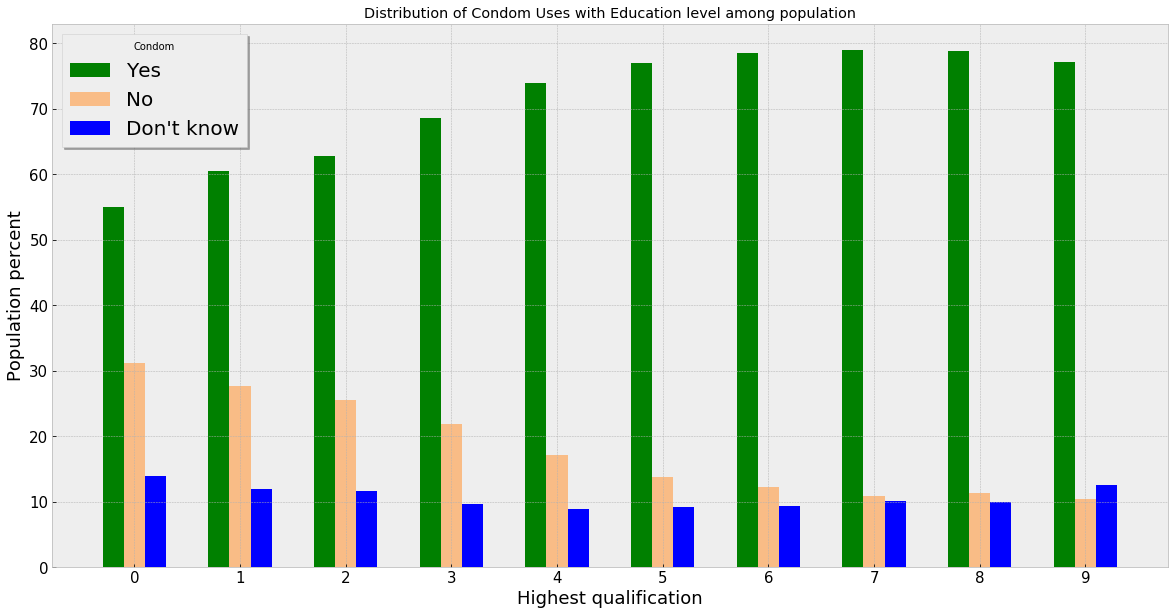

In [18]:
vs_highest_qualification('is_condom', 'Condom', 'Distribution of Condom Uses with Education level among population', 20, 'condom_vs_education.png')

### plot Contraceptive Pills vs Education level for a state

* Trend is similar to condoms
* Contraceptive Pills use varies from only 50% of illiterate women to 80% of graduates and above educated women.
* Its use dwindles a bit in case of Literate With formal education dropouts.
* More fraction of women prefers Pills than Condoms.
* This is specifically visible in case of women who could finish only Senior Secondary education.
* But not much in case of illeterate women.

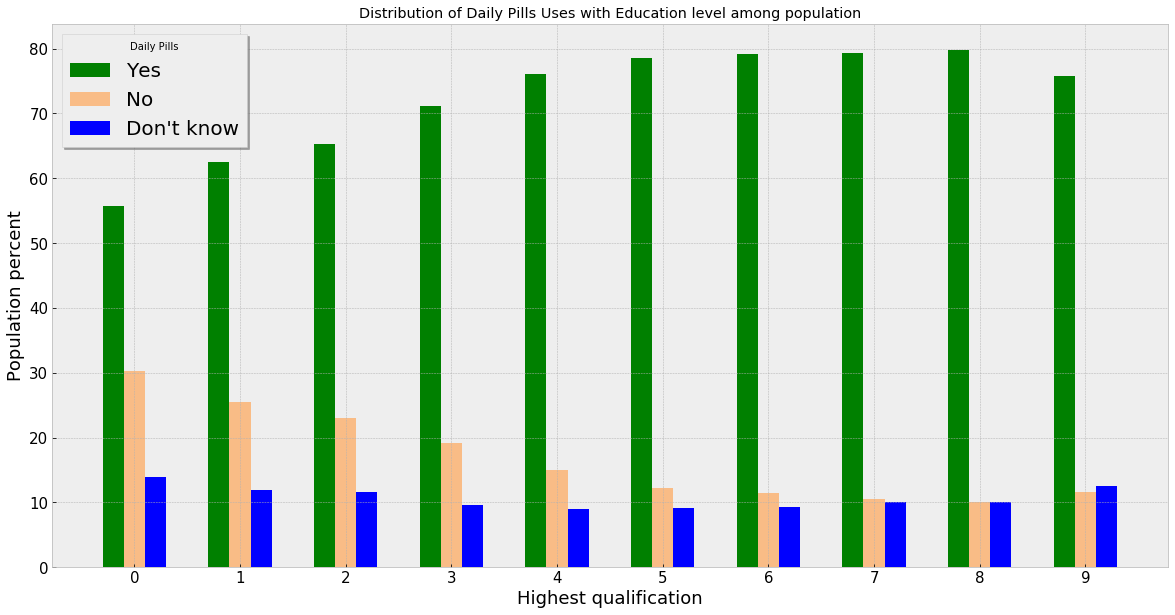

In [19]:
vs_highest_qualification('is_pills_daily', 'Daily Pills', 'Distribution of Daily Pills Uses with Education level among population', 20, 'pills_daily_vs_education.png')

## Population vs Religion:

### plot Condom Use vs Religion for each state

* Condoms is most prevalent in Sikh and Jain.
* Close to 20% of Buddhist are not aware of condoms.
* 25% Hindus don't use condom.
* For those who don't use it, it is possible that they may pursue other means such as Birth Control pills or tubectomy or copperT etc.

7    1.0
8    2.0
9    3.0
10   4.0
11   5.0
12   6.0
13   7.0
Name: religion, dtype: float64


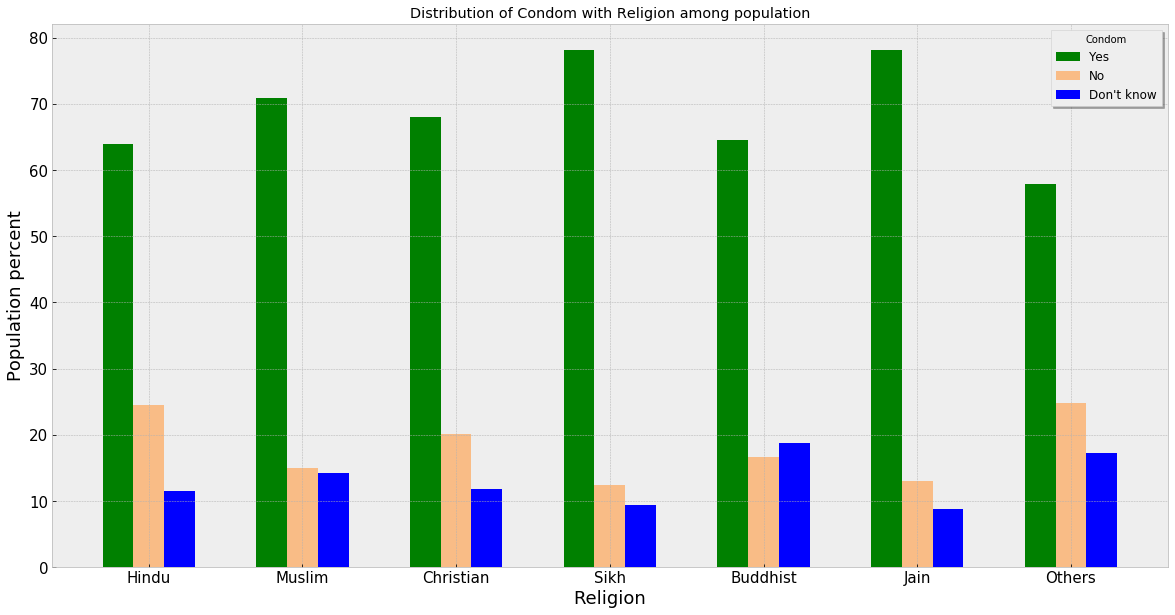

In [20]:
vs_religion('is_condom', 'Condom', 'Distribution of Condom with Religion among population', 12, 'condom_vs_religion.png')

### plot Contraceptive Pills vs Religion for a state

* Situation is identical to condoms.
* Pills as means of contraception is most prevalent in Jain and Sikhs.
* More than 80% Jains women take contraceptive pills daily.
* More than 20% of Hindu women don't use daily_pills as a means to contraception. 
* Not much change appear between condom and pills use. Other religions which include Parsi, Bahai etc prefer contraceptive pills 8-10% more than condoms.

7    1.0
8    2.0
9    3.0
10   4.0
11   5.0
12   6.0
13   7.0
Name: religion, dtype: float64


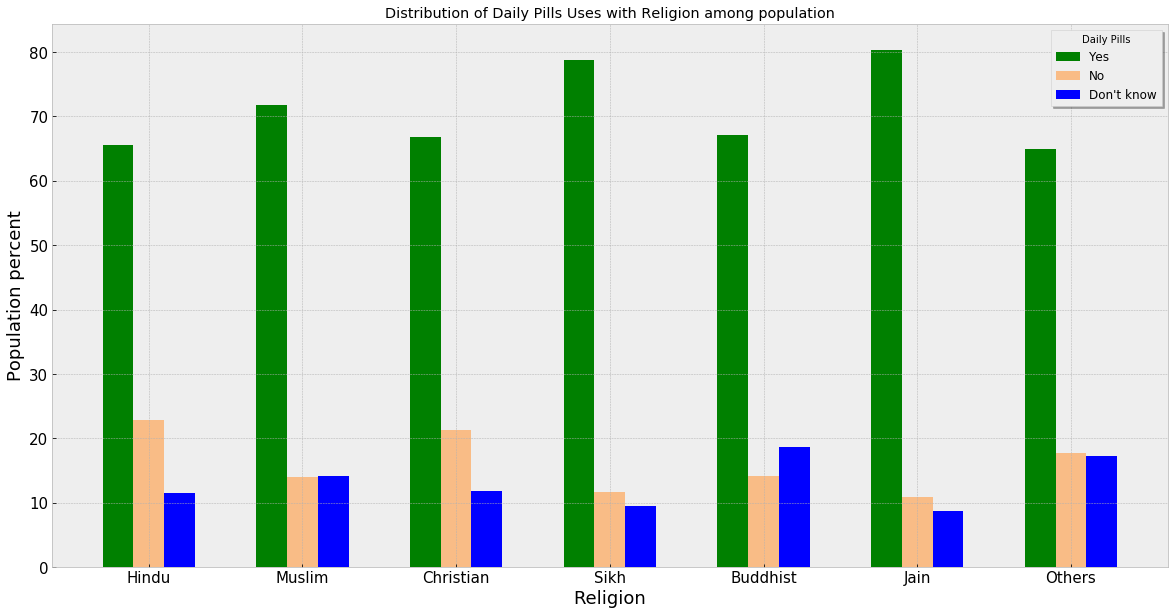

In [21]:
vs_religion('is_pills_daily', 'Daily Pills', 'Distribution of Daily Pills Uses with Religion among population', 12, 'pills_daily_vs_religion.png')

## Population vs District of the state:

### plot Condom Use vs District of a state

* This analysis has been done in Chhattisgarh state.
* Raipur, which is capital of Chhattisgarh has highest percentage of women preferring condoms as a means of contraception.
* Kawardha district has minimum awareness and hence condom is preferred by women.

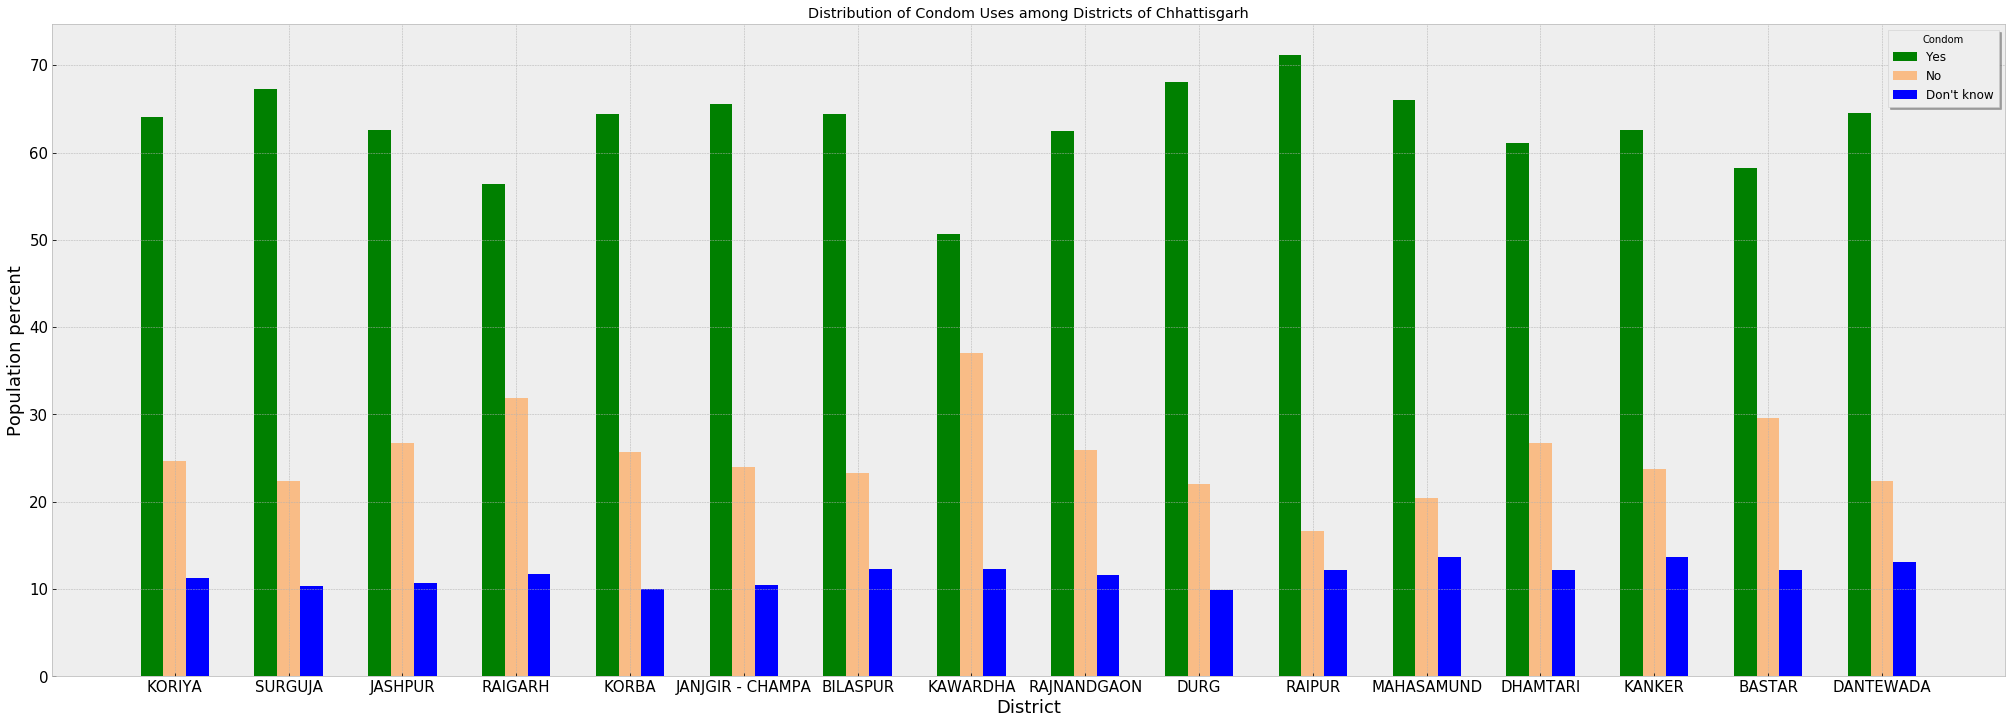

In [23]:
vs_district('is_condom', 'Condom', 'Distribution of Condom Uses among Districts of Chhattisgarh', 12, 'condom_vs_district.png')

### plot Contraceptive Pills vs District of a state

* Again this analysis has been performed over only districts of Chhattisgarh.
* Raipur and Durg has the highest percentage of women using contraceptive pills.
* Durg has highest literacy rate even for women in Chhattisgarh.
* Kawardha and Bastar are lagging in pills uses.
* More than 30% of women population don't use birth control pills.

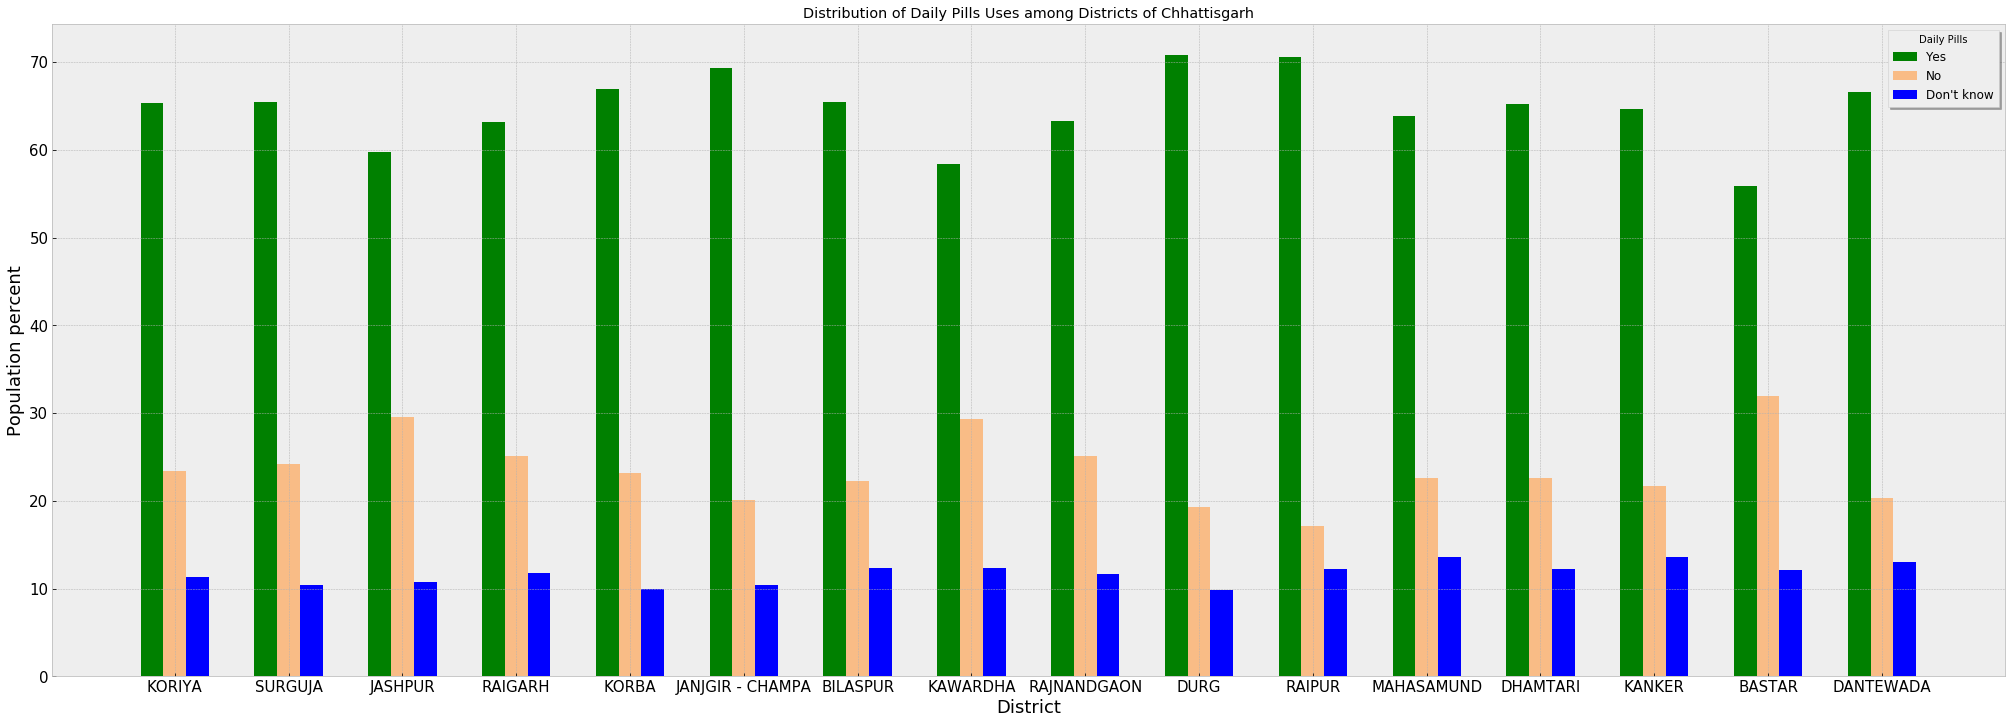

In [24]:
vs_district('is_pills_daily', 'Daily Pills', 'Distribution of Daily Pills Uses among Districts of Chhattisgarh', 12, 'pills_daily_vs_district.png')

## Population vs Born Decade of population:

### plot Condom Use vs Born Decade for a state

* The awareness and preference of modern contraceptive methods increases as population gets more younger.
* Condom preference varies from around 50% of women born in 1961-1970 to 70% of women born in 1981-1990.
* Condom preference decreases be few % in case of women born in 1991-2000. 
* This is because such popultion ranges from age 21 to 11. So they are not much literate.

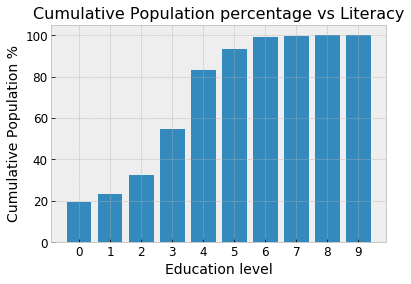

In [25]:
df1 = df[(df.year_of_birth >= 1991) & (df.year_of_birth <= 2000)].highest_qualification.value_counts()
D = (dict(df1))
l_zip = list(zip(D.keys(), D.values()))
l__zip_sorted = sorted(l_zip,key=lambda x: (x[0]))
x_axis, y_axis = zip(*l__zip_sorted) 
x_axis = list(x_axis)
y_axis = list(y_axis)
y_sum = sum(y_axis)
for i in range(1, len(y_axis)):
    y_axis[i] += y_axis[i-1]
y_axis = [100*c/y_sum for c in y_axis]

plt.xticks(x_axis)
plt.title('Cumulative Population percentage vs Literacy', fontsize=16)
ax = plt.gca()
ax.tick_params(axis = 'both', labelsize = 12)

plt.xlabel('Education level', fontsize=14)
plt.ylabel('Cumulative Population %', fontsize=14)

plt.bar(list(x_axis), list(y_axis), align='center')
plt.savefig('cumulative_population_vs_education.png')
plt.show()
# pd.value_counts(df.loc[(df.year_of_birth >= 1991) & (df.year_of_birth <= 2000), 'highest_qualification'], sort=True, ascending=False).plot.bar()

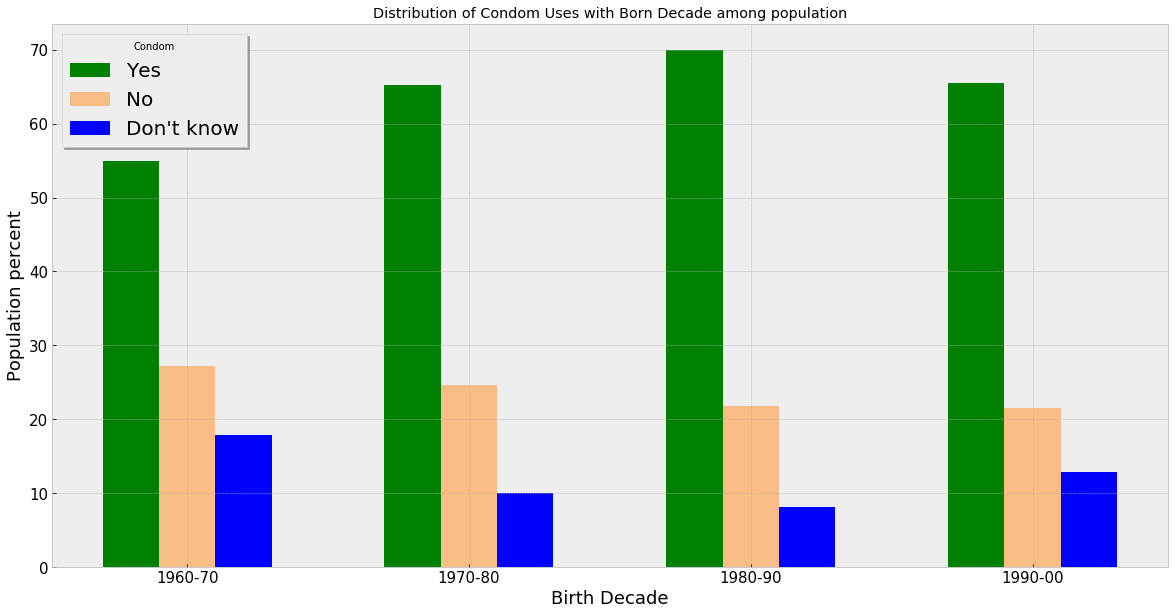

In [26]:
vs_born_decade('is_condom', 'Condom', 'Distribution of Condom Uses with Born Decade among population', 20, 'condom_vs_born_decade.png')

### plot Contraceptive Pills vs Born Decade for a state

* Again trend is similar to condoms
* More fraction of women prefers Pills than Condoms irrespective of born decade.

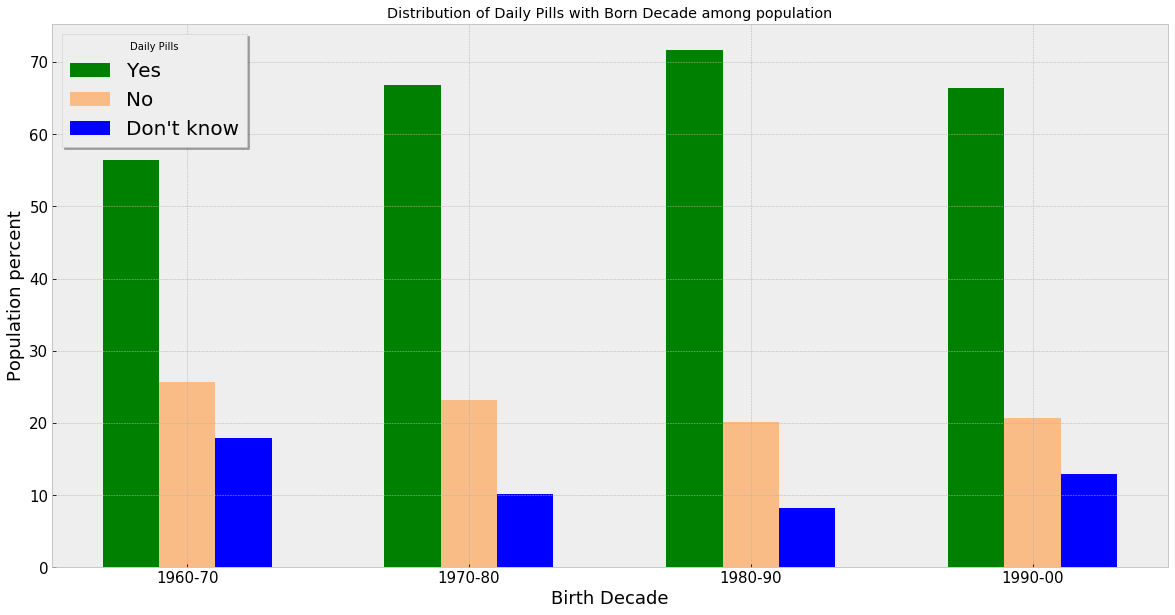

In [27]:
vs_born_decade('is_pills_daily', 'Daily Pills', 'Distribution of Daily Pills with Born Decade among population', 20, 'pills_daily_vs_born_decade.png')

## Tubectomy vs Demographic variables:

In [28]:
a = 'is_tubectomy'
legend_title = 'Tubectomy done'
print(df.is_tubectomy.value_counts())
print(df.is_tubectomy.isnull().sum())

1.0    671665
2.0     16101
Name: is_tubectomy, dtype: int64
89865


### Plot is_tubectomy vs Education level for a state

Note: The graph though seems to tell that more than 90% population has undergone tubectomy but that is not the case.
13% women haven't reported anything about whether they have undergone tubectomy or not.
How many young generation has undergone tubectomy?
Plot: Tubectomy vs Age group.

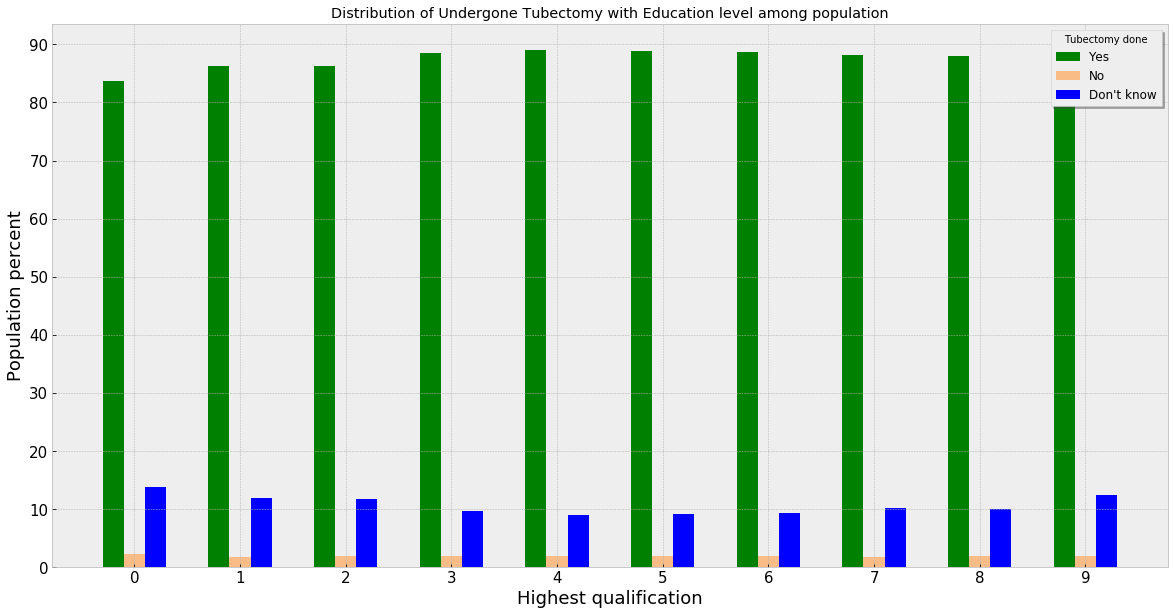

In [29]:
vs_highest_qualification('is_tubectomy', 'Tubectomy done', 'Distribution of Undergone Tubectomy with Education level among population', 12, 'tubectomy_vs_education.png')

### Plot is_tubectomy vs Religion for a state

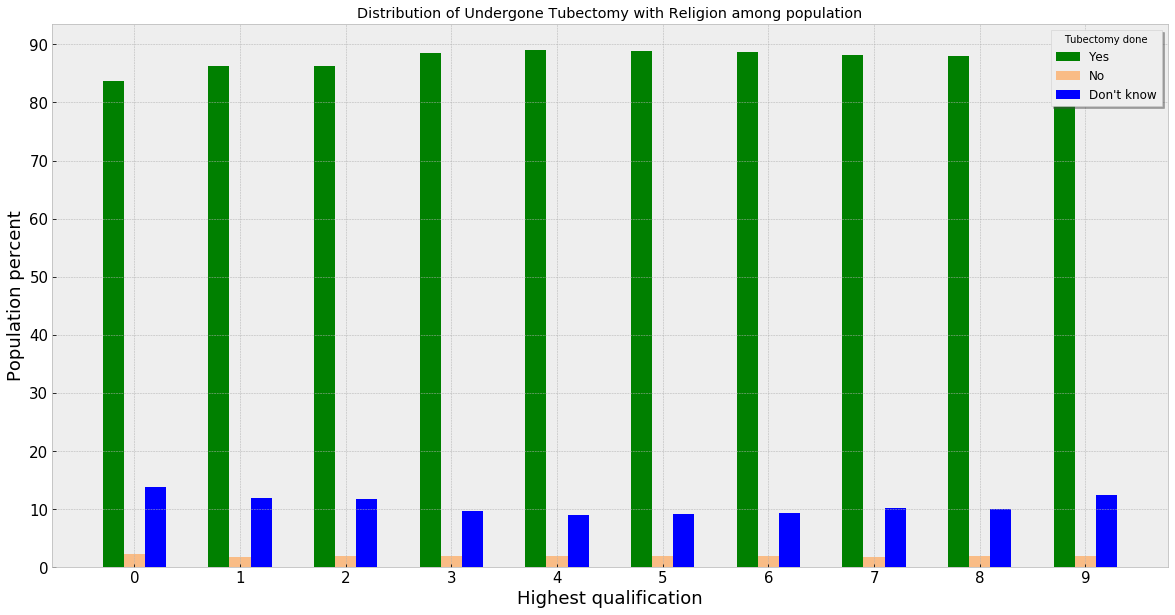

In [30]:
vs_highest_qualification('is_tubectomy', 'Tubectomy done', 'Distribution of Undergone Tubectomy with Religion among population', 12, 'tubectomy_vs_religion.png')

### Plot is_tubectomy vs District of a state

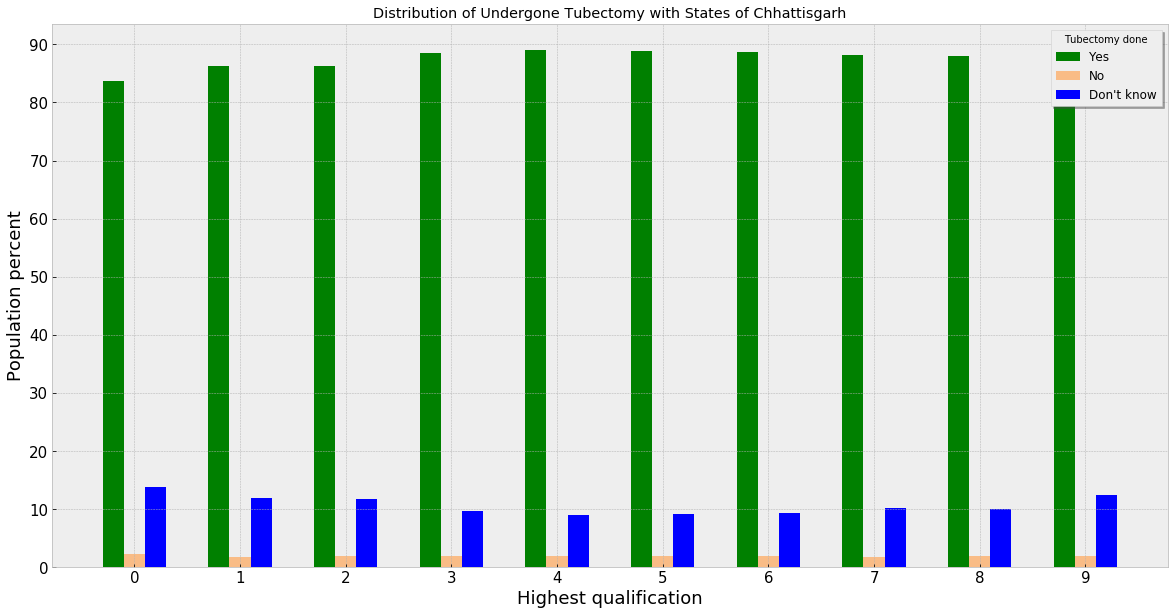

In [31]:
vs_highest_qualification('is_tubectomy', 'Tubectomy done', 'Distribution of Undergone Tubectomy with States of Chhattisgarh', 12, 'tubectomy_vs_district.png')

## CopperT vs Demographic variables:

### Plot is_copper_t vs Education level for a state

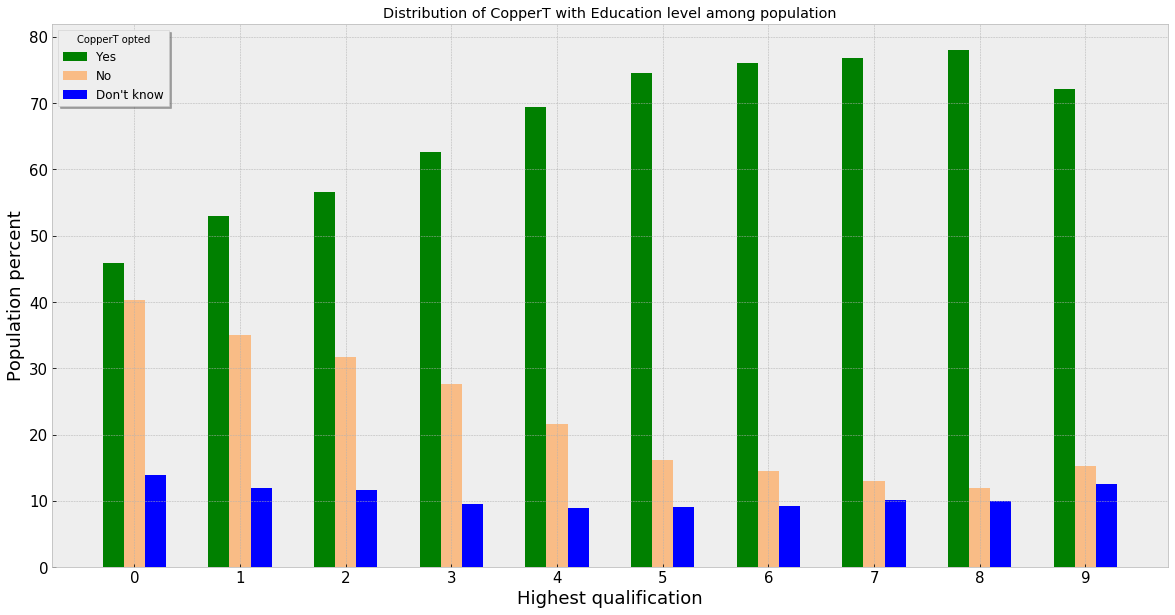

In [32]:
vs_highest_qualification('is_copper_t', 'CopperT opted', 'Distribution of CopperT with Education level among population', 12, 'copperT_vs_education.png')

### Plot is_copper_t vs Religion for a state

7    1.0
8    2.0
9    3.0
10   4.0
11   5.0
12   6.0
13   7.0
Name: religion, dtype: float64


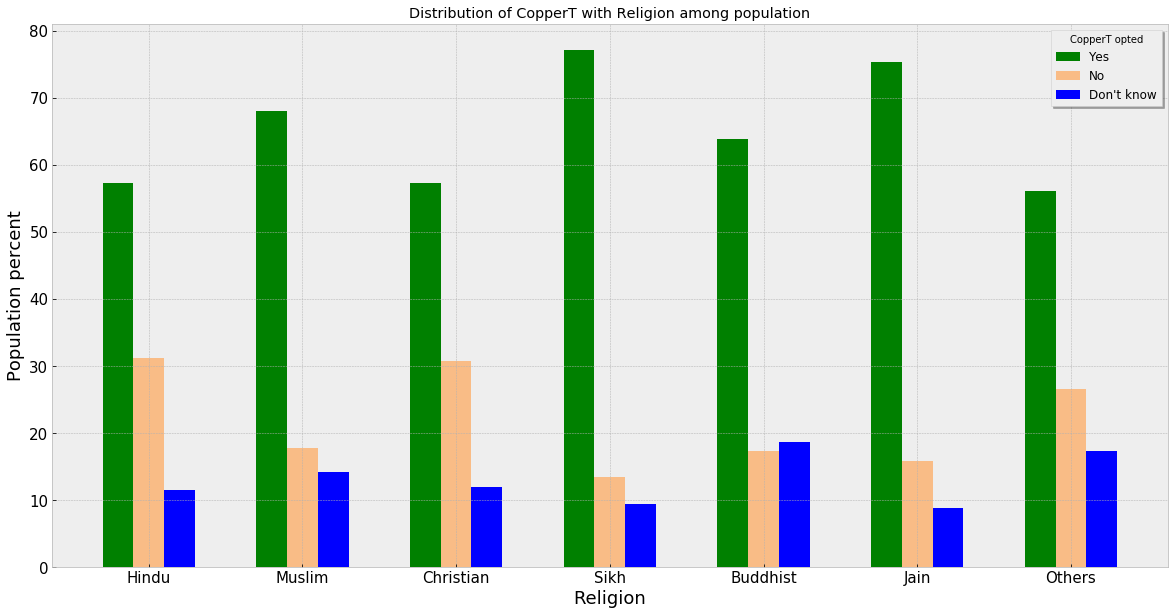

In [33]:
vs_religion('is_copper_t', 'CopperT opted', 'Distribution of CopperT with Religion among population', 12, 'copperT_vs_religion.png')

### Plot is_copper_t vs District of a state

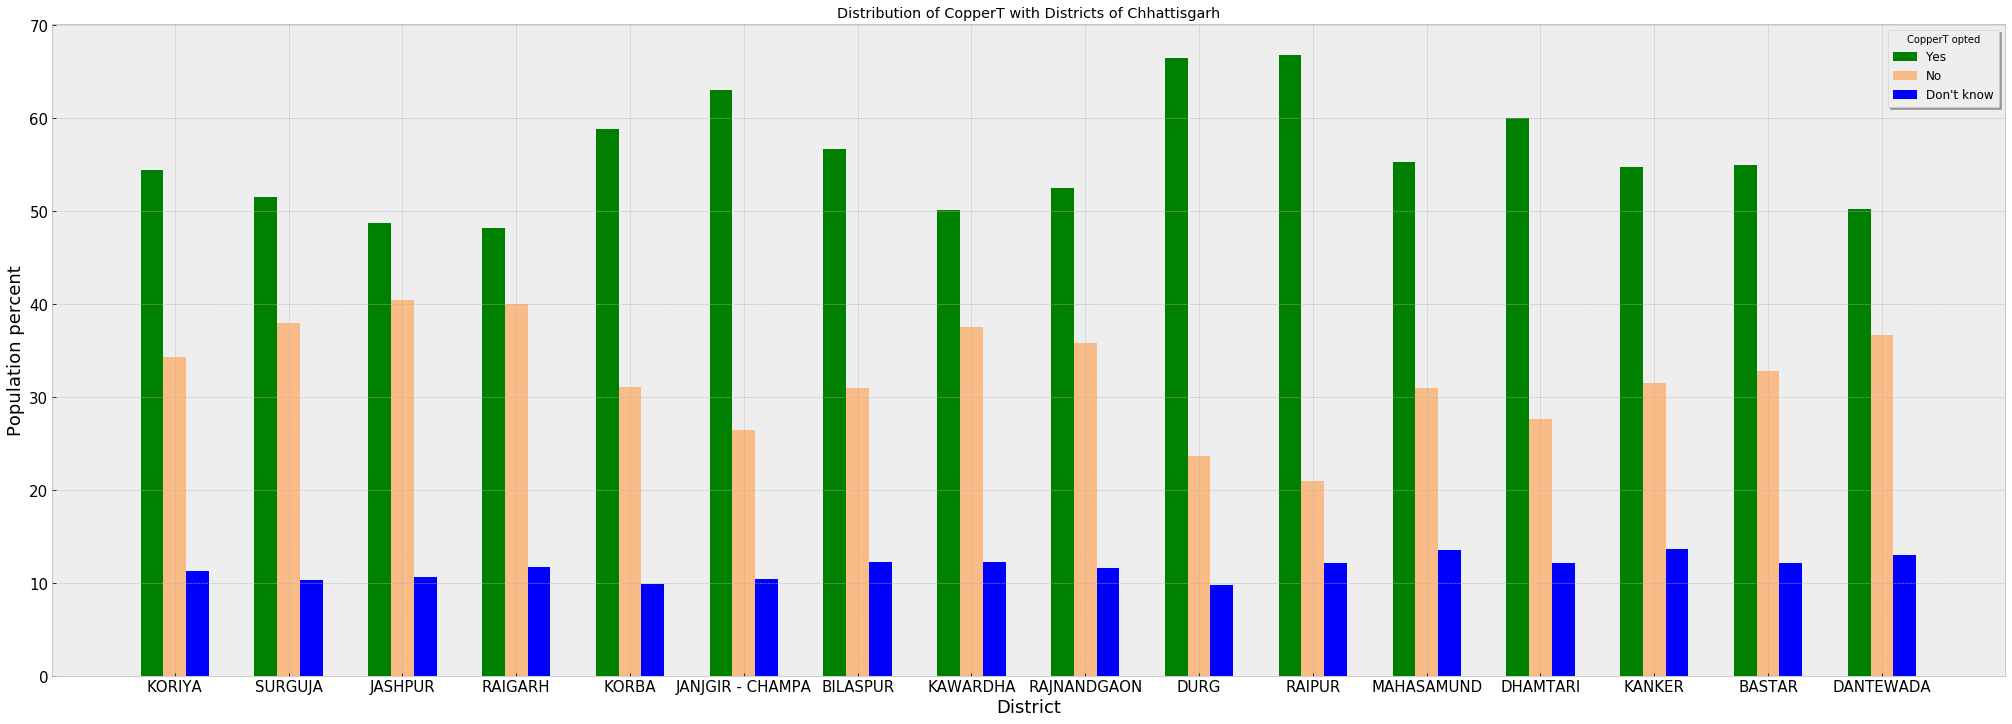

In [34]:
vs_district('is_copper_t', 'CopperT opted', 'Distribution of CopperT with Districts of Chhattisgarh', 12, 'copperT_vs_district.png')

## Aware about Home available Food during Diarrhoea vs Demographic variables:

### Plot aware_abt_haf vs Education level for a state

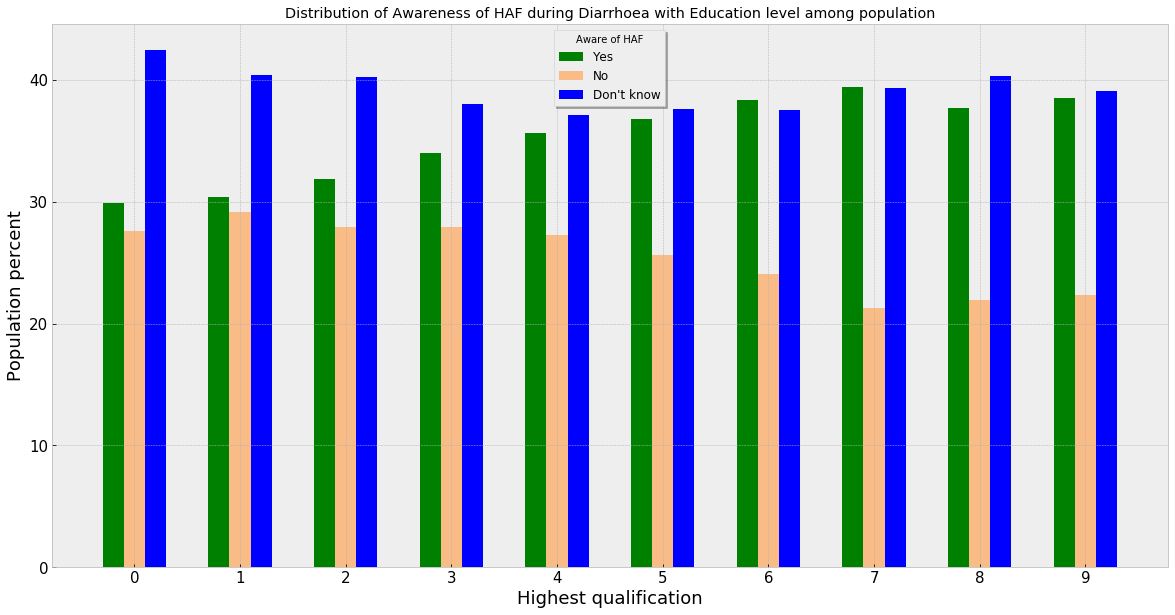

In [35]:
vs_highest_qualification('aware_abt_haf', 'Aware of HAF', 'Distribution of Awareness of HAF during Diarrhoea with Education level among population', 12, 'aware_of_haf_vs_education.png')

### Plot aware_abt_haf vs Religion for a state

7    1.0
8    2.0
9    3.0
10   4.0
11   5.0
12   6.0
13   7.0
Name: religion, dtype: float64


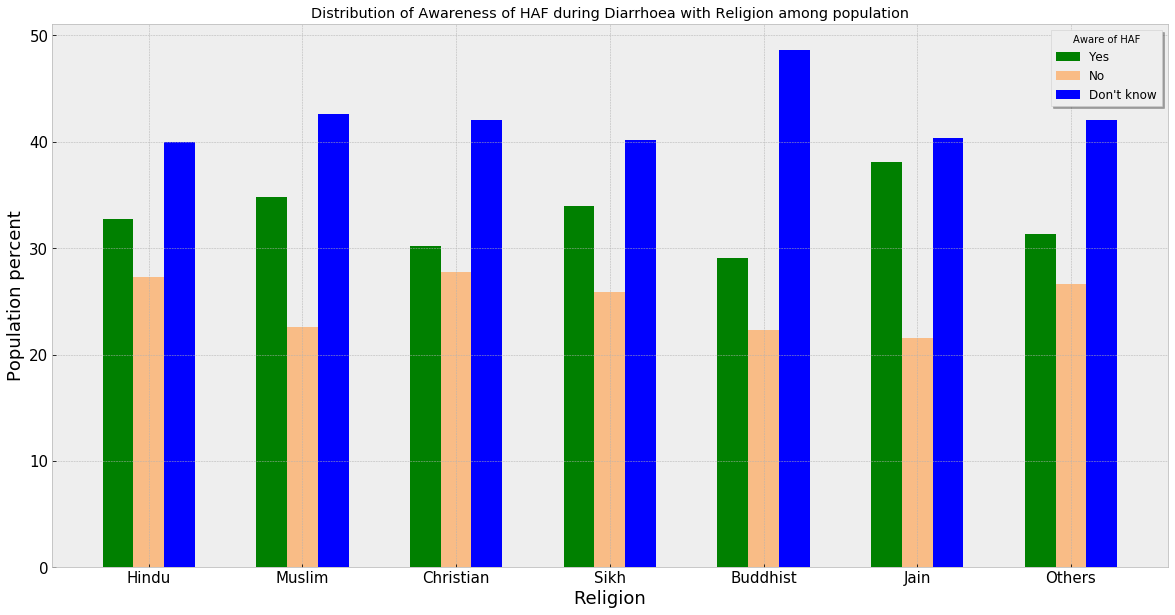

In [36]:
vs_religion('aware_abt_haf', 'Aware of HAF', 'Distribution of Awareness of HAF during Diarrhoea with Religion among population', 12, 'aware_of_haf_vs_religion.png')

### Plot aware_abt_haf vs District of a state

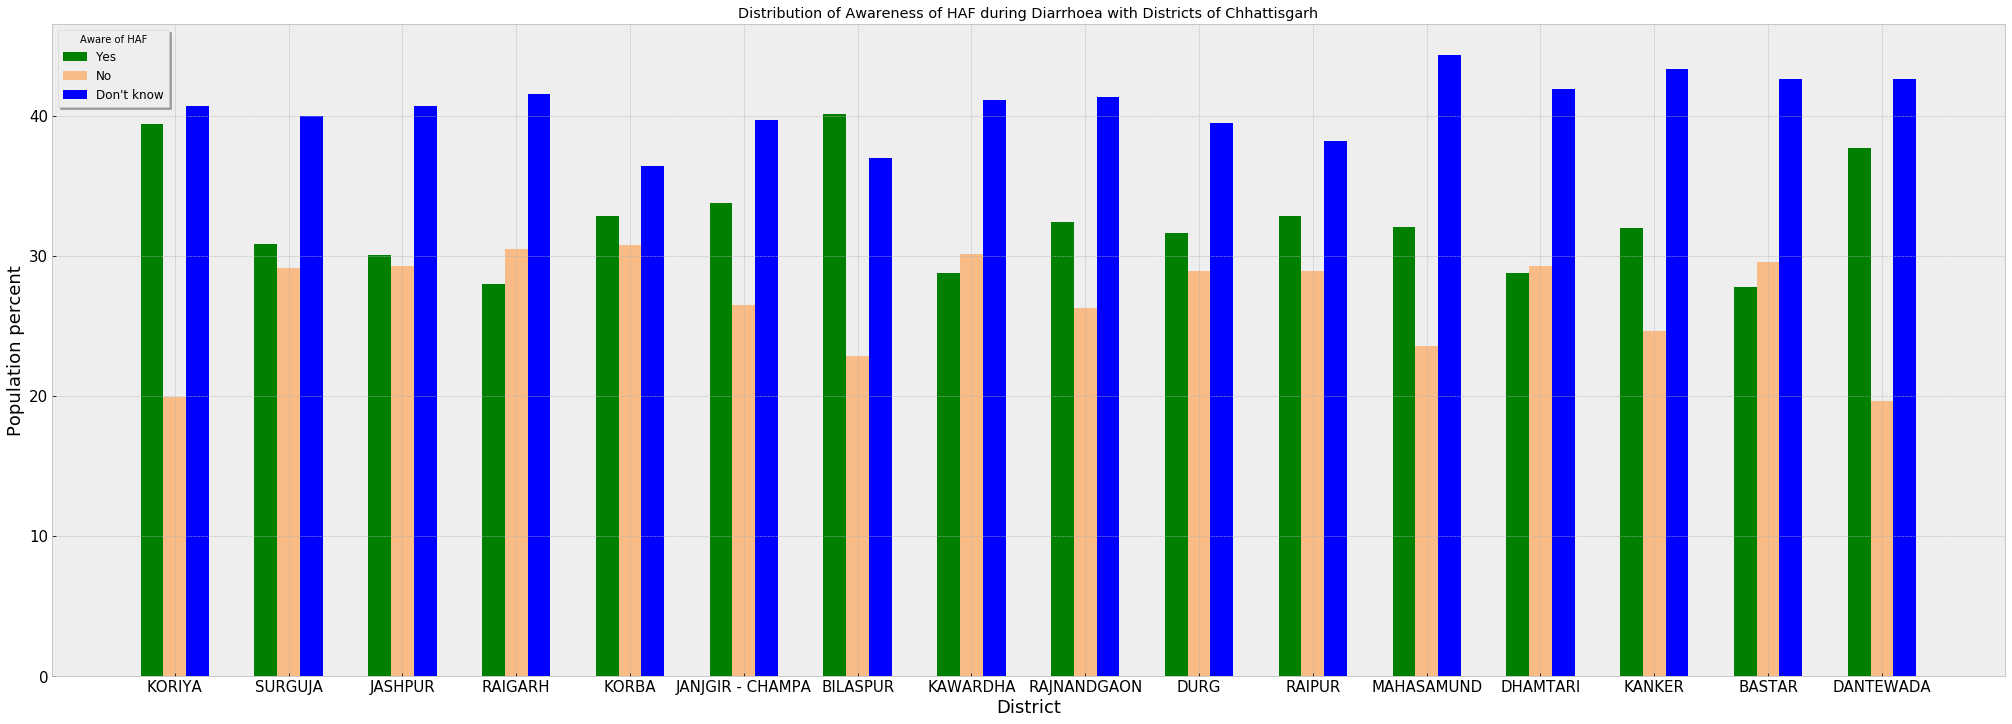

In [37]:
vs_district('aware_abt_haf', 'Aware of HAF', 'Distribution of Awareness of HAF during Diarrhoea with Districts of Chhattisgarh', 12, 'aware_of_haf_vs_district.png')

## Aware about ORT and ORS vs Demographic variables:

### Plot Aware about ORT and ORS vs Education level for a state

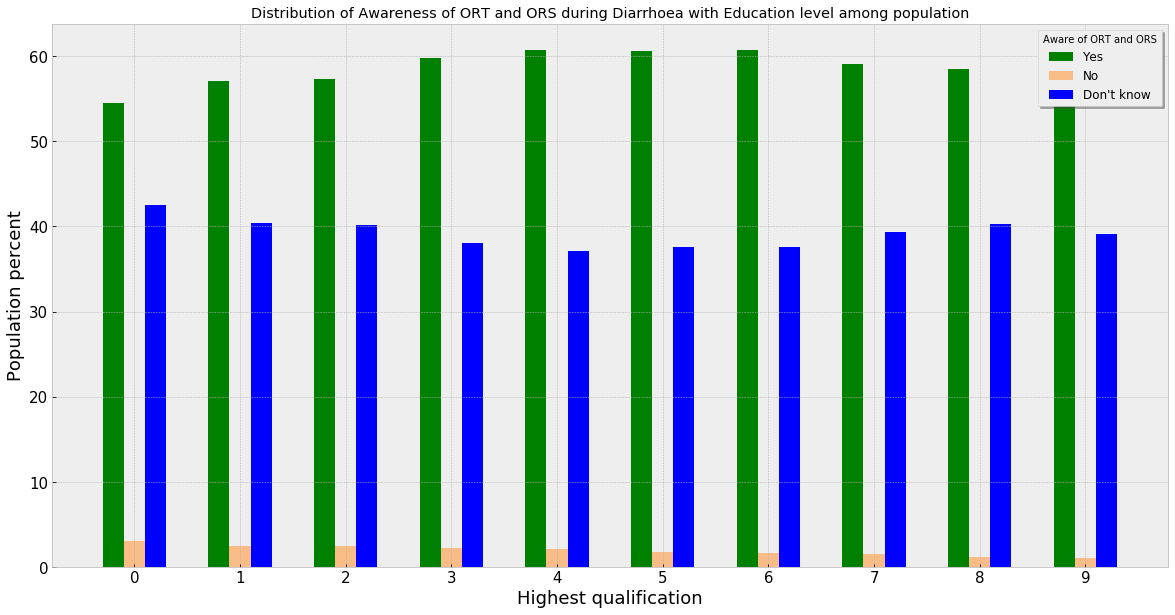

In [38]:
vs_highest_qualification('aware_abt_ort_ors', 'Aware of ORT and ORS', 'Distribution of Awareness of ORT and ORS during Diarrhoea with Education level among population', 12, 'aware_of_ort_ors_vs_education.png')

### Plot Aware about ORT and ORS vs Religion for a state

7    1.0
8    2.0
9    3.0
10   4.0
11   5.0
12   6.0
13   7.0
Name: religion, dtype: float64


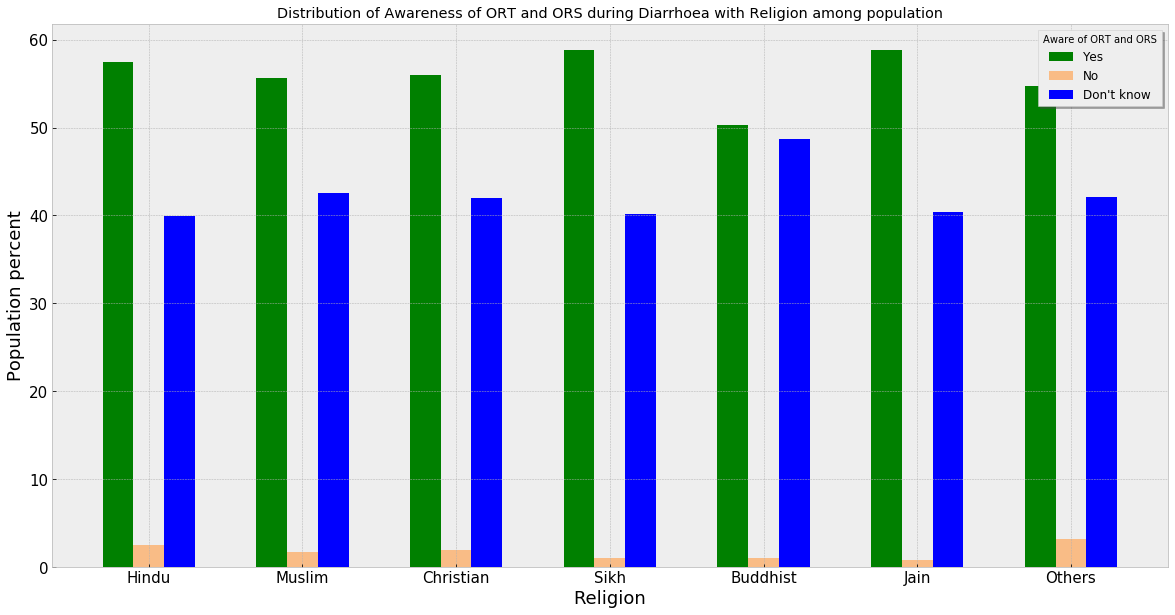

In [39]:
vs_religion('aware_abt_ort_ors', 'Aware of ORT and ORS', 'Distribution of Awareness of ORT and ORS during Diarrhoea with Religion among population', 12, 'aware_of_ort_ors_vs_religion.png')

### Plot Aware about ORT and ORS vs District of a state

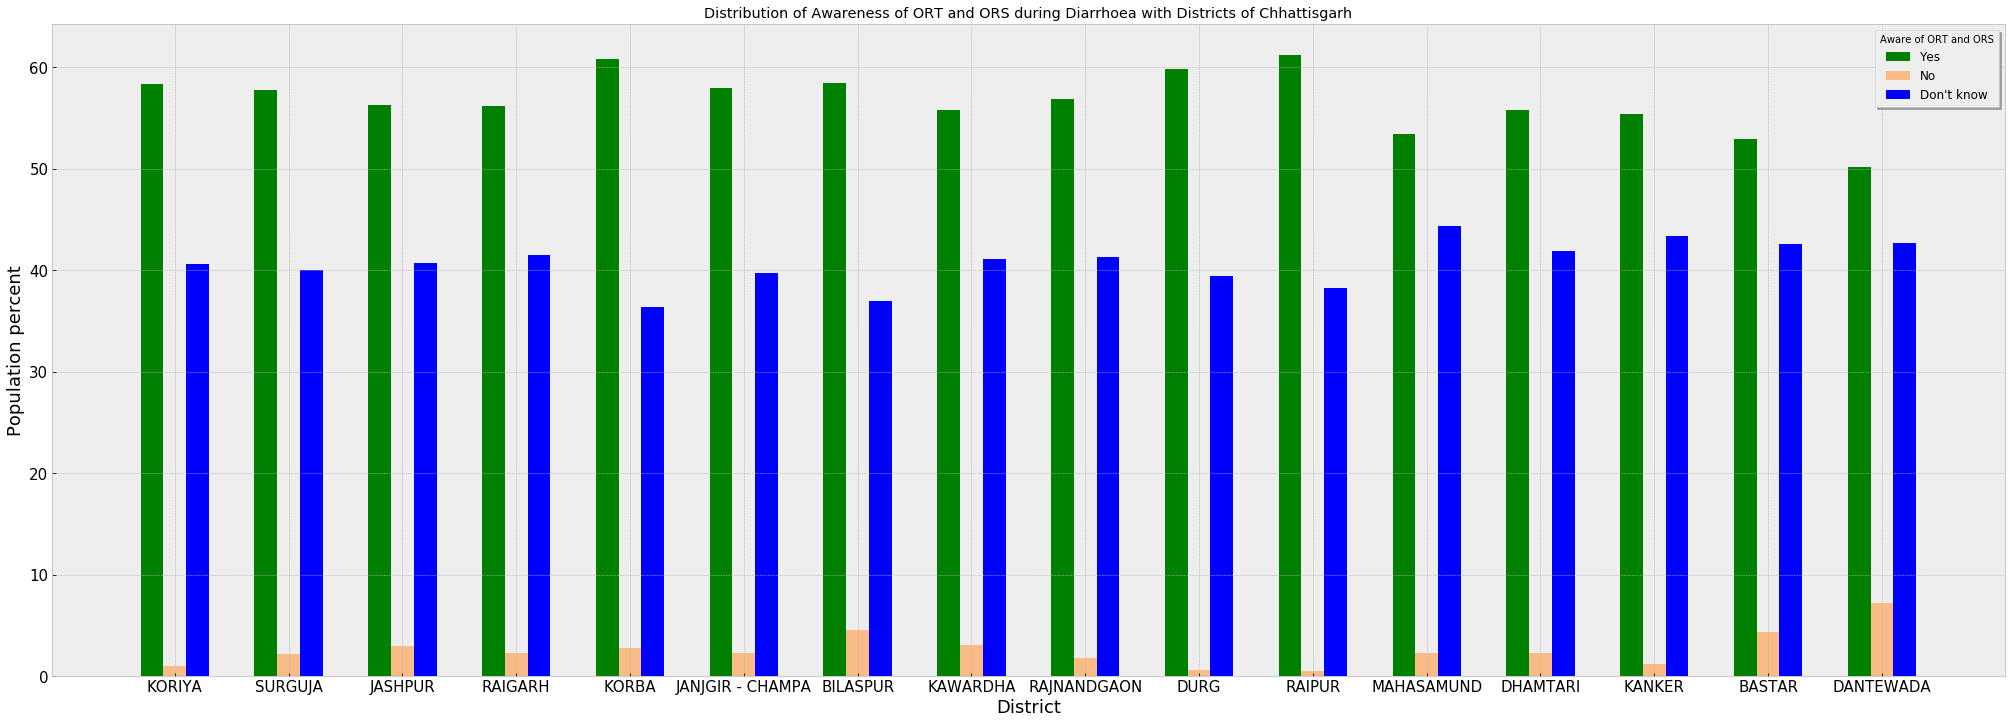

In [40]:
vs_district('aware_abt_ort_ors', 'Aware of ORT and ORS', 'Distribution of Awareness of ORT and ORS during Diarrhoea with Districts of Chhattisgarh', 12, 'aware_of_ort_ors_vs_district.png')

## Aware about ORT, ORS and Zinc vs Demographic variables:

### Plot Aware about ORT, ORS and Zinc vs Education level for a state

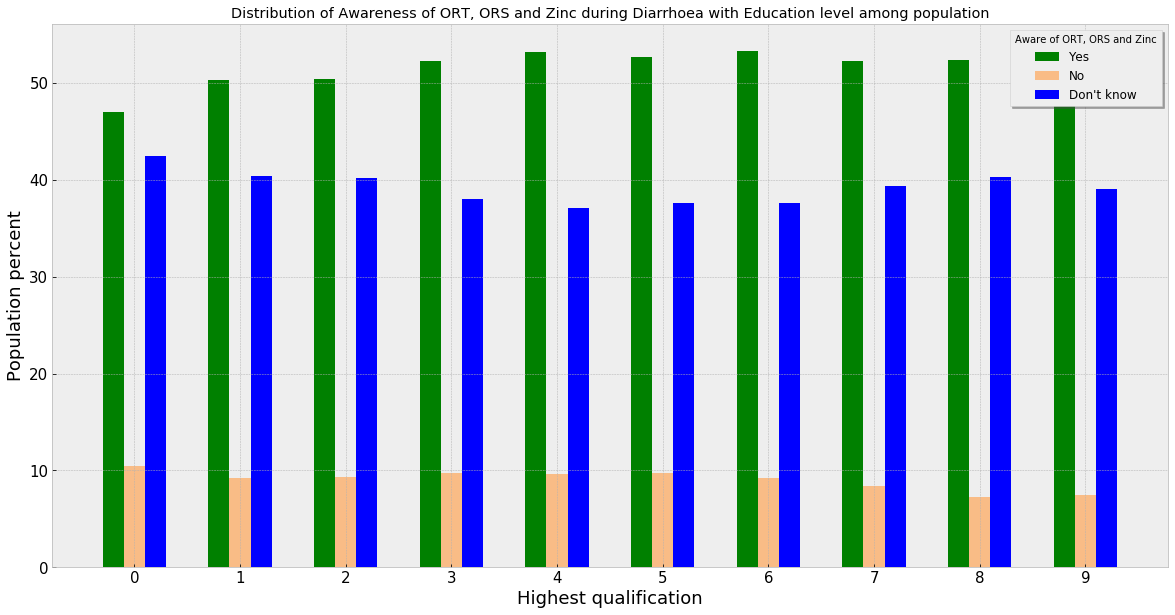

In [41]:
vs_highest_qualification('aware_abt_ort_ors_zinc', 'Aware of ORT, ORS and Zinc', 'Distribution of Awareness of ORT, ORS and Zinc during Diarrhoea with Education level among population', 12, 'aware_of_ort_ors_zinc_vs_education.png')

### Plot Aware about ORT, ORS and Zinc vs Religion for a state

7    1.0
8    2.0
9    3.0
10   4.0
11   5.0
12   6.0
13   7.0
Name: religion, dtype: float64


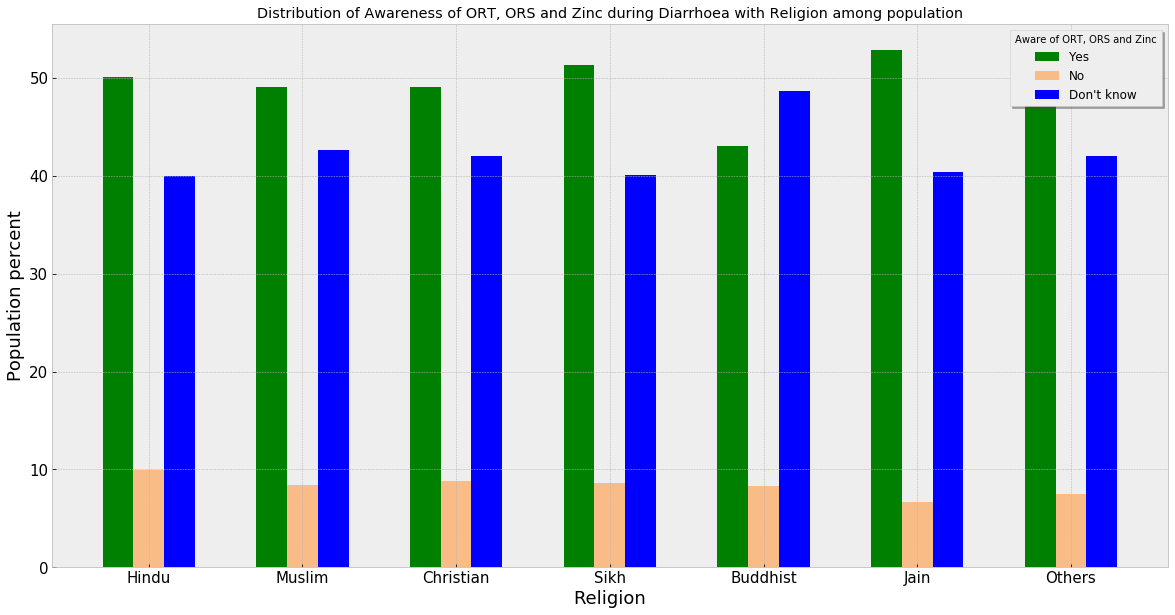

In [42]:
vs_religion('aware_abt_ort_ors_zinc', 'Aware of ORT, ORS and Zinc', 'Distribution of Awareness of ORT, ORS and Zinc during Diarrhoea with Religion among population', 12, 'aware_of_ort_ors_zinc_vs_religion.png')

### Plot Aware about ORT, ORS and Zinc vs District of a state

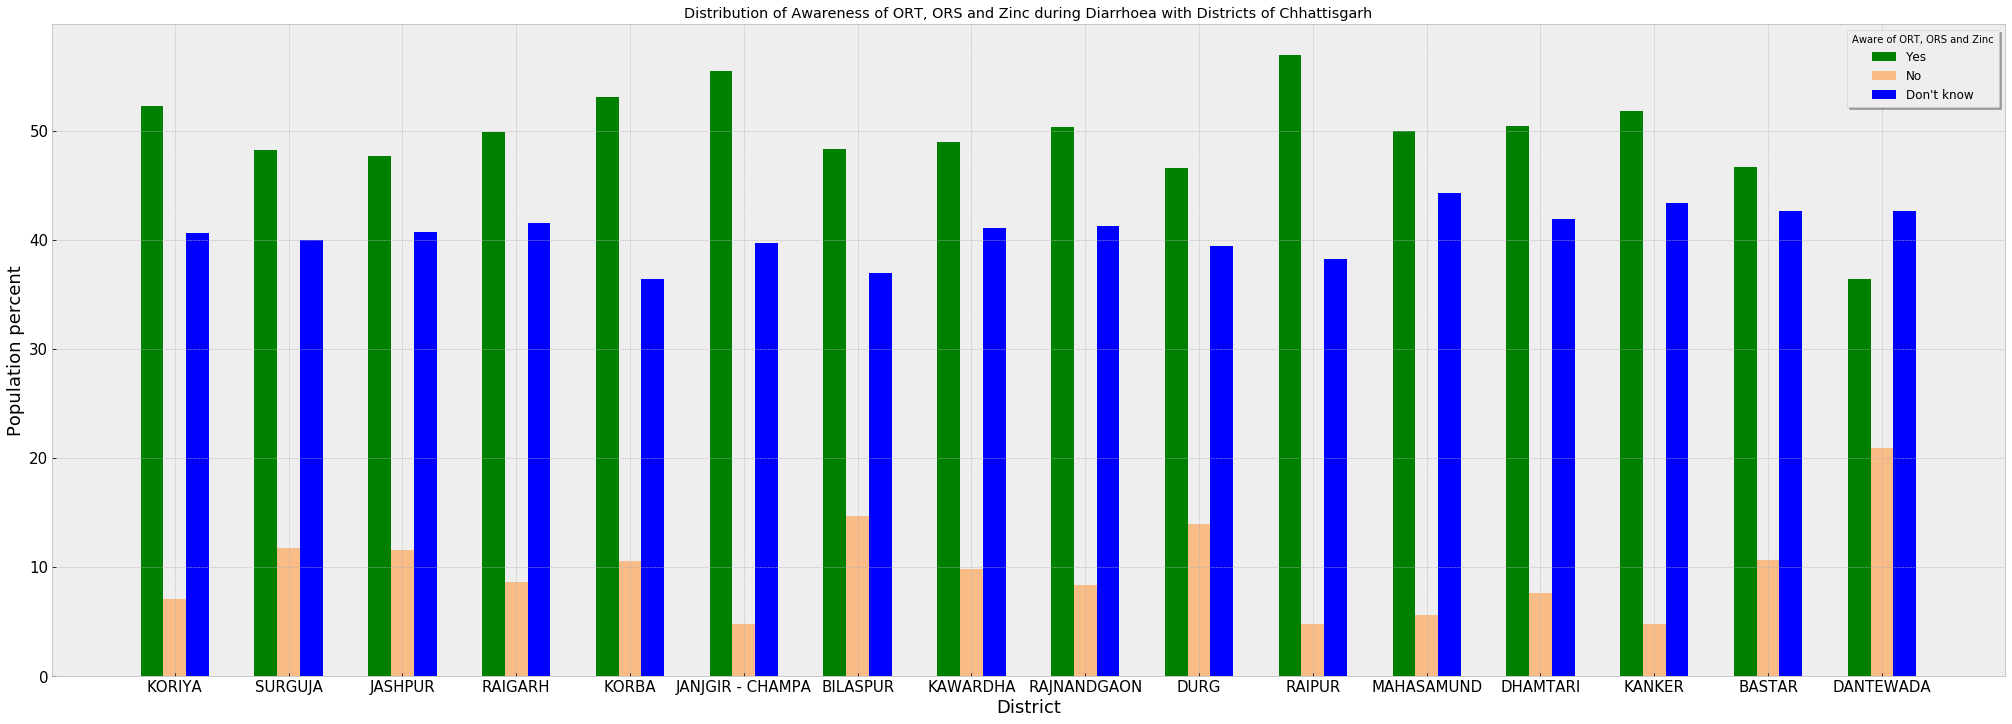

In [43]:
vs_district('aware_abt_ort_ors_zinc', 'Aware of ORT, ORS and Zinc', 'Distribution of Awareness of ORT, ORS and Zinc during Diarrhoea with Districts of Chhattisgarh', 12, 'aware_of_ort_ors_zinc_vs_district.png')

## Diagnosed_for vs Demographic variables:

In [193]:
a = 'diagnosed_for'
legend_title = 'Diagnosed_for'
df.diagnosed_for.value_counts()